Related urls, will remove once finished:
- https://medium.com/data-science-in-your-pocket/automl-for-time-series-forecasting-using-autots-with-example-735fb559443a
- https://github.com/winedarksea/AutoTS#tips-for-speed-and-large-data

Import libraries

In [1]:
import pandas as pd
from autots import AutoTS
from autots.models.model_list import model_lists
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from metrics import print_evaluation_metrics

Load dataset

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)
df = df[[date_column, target_column]]
df[date_column] = pd.to_datetime(df[date_column], format="%Y-%m-%d")


df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
dates = df.index.values

Create model

In [3]:
data_length = len(df)
train_split = 0.9
model = AutoTS(
    forecast_length=(int(data_length*(1-train_split))),
    frequency="D",
    prediction_interval=0.95,
    ensemble=None,
    models_mode="gradient_boosting",
    model_list="univariate",
    max_generations=5,
    num_validations=3,
    no_negatives=True,
    transformer_list="fast",
    n_jobs="auto",
)

Using 6 cpus for n_jobs.


In [6]:
print(model_lists.keys())

dict_keys(['all', 'default', 'fast', 'superfast', 'parallel', 'fast_parallel', 'fast_parallel_no_arima', 'probabilistic', 'multivariate', 'univariate', 'no_params', 'recombination_approved', 'no_shared', 'no_shared_fast', 'experimental', 'slow', 'gpu', 'regressor', 'best', 'motifs', 'all_result_path', 'regressions', 'all_pragmatic', 'update_fit'])


In [7]:
print(model_lists["univariate"])

['MetricMotif', 'GLS', 'MLEnsemble', 'DatepartRegression', 'GLM', 'PreprocessingRegression', 'Theta', 'UnobservedComponents', 'FFT', 'NeuralProphet', 'UnivariateMotif', 'UnivariateRegression', 'SeasonalNaive', 'ARIMA', 'ETS', 'ConstantNaive', 'KalmanStateSpace', 'LastValueNaive', 'ARDL', 'AverageValueNaive', 'FBProphet', 'SeasonalityMotif', 'ARCH']


Train test split, fit and prediction

In [4]:
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]
model.fit(train[target_column])
prediction = model.predict(forecast_length=len(test))

Export model

In [19]:
model.export_template(
    "model.json",
    models="best",
    max_per_model_class=1,
    include_results=True,
)

Import model

In [15]:
# declare the AutoTS object "model" first
model = model.import_template(
    "model.csv",
    method="only",
    enforce_model_list=True,
)
model.fit(train[target_column])
prediction = model.predict(forecast_length=len(test))

Data frequency is: D, used frequency is: D
Model Number: 2271 with model KalmanStateSpace in generation 0 of 5
Model Number: 2272 with model SeasonalityMotif in generation 0 of 5
Model Number: 2273 with model ETS in generation 0 of 5
Model Number: 2274 with model AverageValueNaive in generation 0 of 5
Model Number: 2275 with model GLS in generation 0 of 5
Model Number: 2276 with model UnobservedComponents in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2277 with model FBProphet in generation 0 of 5
Model Number: 2278 with model LastValueNaive in generation 0 of 5
Model Number: 2279 with model ARIMA in generation 0 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.46980D-01    |proj g|=  1.85996D-01

At iterate    1    f=  3.45041D-01    |proj g|=  1.14429D-01

At iterate    2    f=  3.43963D-01    |proj g|=  8.03410D-02

At iterate    3    f=  3.35141D-01    |proj g|=  1.98384D-01

At iterate    4    f=  3.19353D-01    |proj g|=  4.48351D-01

At iterate    5    f=  3.06518D-01    |proj g|=  4.66028D-01

At iterate    6    f=  2.80019D-01    |proj g|=  3.99208D-01

At iterate    7    f=  2.59929D-01    |proj g|=  4.76799D-01

At iterate    8    f=  2.53692D-01    |proj g|=  4.41222D-02

At iterate    9    f=  2.53452D-01    |proj g|=  1.92718D-02

At iterate   10    f=  2.532

 This problem is unconstrained.


Model Number: 2281 with model FFT in generation 0 of 5
Model Number: 2282 with model ARDL in generation 0 of 5
Model Number: 2283 with model Theta in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2284 with model UnivariateRegression in generation 0 of 5
Model Number: 2285 with model GLM in generation 0 of 5
Model Number: 2286 with model MetricMotif in generation 0 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 2287 with model ConstantNaive in generation 0 of 5
Model Number: 2288 with model UnivariateMotif in generation 0 of 5
New Generation: 1 of 5
Model Number: 2289 with model UnivariateMotif in generation 1 of 5
Model Number: 2290 with model MetricMotif in generation 1 of 5
Model Number: 2291 with model ETS in generation 1 of 5
Model Number: 2292 with model FBProphet in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2293 with model FBProphet in generation 1 of 5
Model Number: 2294 with model UnivariateRegression in generation 1 of 5
Model Number: 2295 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.19747D+09    |proj g|=  1.83261D+14

At iterate    1    f=  2.10139D+03    |proj g|=  3.41814D+05


 This problem is unconstrained.



At iterate    2    f=  1.93616D+03    |proj g|=  3.02228D+05

At iterate    3    f=  1.13370D+03    |proj g|=  1.35729D+05

At iterate    4    f=  7.97810D+02    |proj g|=  8.03172D+04

At iterate    5    f=  5.23352D+02    |proj g|=  4.27957D+04

At iterate    6    f=  3.52516D+02    |proj g|=  2.37572D+04

At iterate    7    f=  2.34429D+02    |proj g|=  1.29620D+04

At iterate    8    f=  1.56134D+02    |proj g|=  7.10518D+03

At iterate    9    f=  1.03412D+02    |proj g|=  3.87590D+03

At iterate   10    f=  6.81549D+01    |proj g|=  2.10873D+03

At iterate   11    f=  4.45549D+01    |proj g|=  1.14086D+03

At iterate   12    f=  2.88121D+01    |proj g|=  6.12660D+02

At iterate   13    f=  1.83546D+01    |proj g|=  3.25487D+02

At iterate   14    f=  1.14645D+01    |proj g|=  1.70375D+02

At iterate   15    f=  6.98517D+00    |proj g|=  8.73923D+01

At iterate   16    f=  4.13420D+00    |proj g|=  4.35970D+01

At iterate   17    f=  2.37396D+00    |proj g|=  2.08842D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   36    f= -3.44371D+00    |proj g|=  1.99187D-01

At iterate   37    f= -3.44371D+00    |proj g|=  1.01199D-01

At iterate   38    f= -3.44371D+00    |proj g|=  1.05174D-01

At iterate   39    f= -3.44371D+00    |proj g|=  1.94555D-01
  ys=-1.142E-07  -gs= 1.220E-07 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40    142      3     2     0   1.946D-01  -3.444D+00
  F =  -3.4437078771050467     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 2296 with model ETS in generation 1 of 5



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 2297 with model GLM in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 2298 with model FFT in generation 1 of 5
Model Number: 2299 with model UnobservedComponents in generation 1 of 5
Model Number: 2300 with model KalmanStateSpace in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2300 in generation 1: KalmanStateSpace
Model Number: 2301 with model UnivariateMotif in generation 1 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 2301 in generation 1: UnivariateMotif
Model Number: 2302 with model KalmanStateSpace in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Template Eval Error: Exception('Transformer DifferencedTransformer failed on inverse') in model 2302 in generation 1: KalmanStateSpace
Model Number: 2303 with model UnobservedComponents in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2303 in generation 1: UnobservedComponents
Model Number: 2304 with model SeasonalityMotif in generation 1 of 5
Template Eval Error: Exception('Transformer ReplaceConstant failed on fit') in model 2304 in generation 1: SeasonalityMotif
Model Number: 2305 with model LastValueNaive in generation 1 of 5
Model Number: 2306 with model FBProphet in generation 1 of 5
Model Number: 2307 with model LastValueNaive in generation 1 of 5
Model Number: 2308 with model GLS in generation 1 of 5
Model Number: 2309 with model KalmanStateSpace in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 2310 with model FBProphet in generation 1 of 5
Model Number: 2311 with model KalmanStateSpace in generation 1 of 5
Model Number: 2312 with model GLS in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2313 with model KalmanStateSpace in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2314 with model FBProphet in generation 1 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 2314 in generation 1: FBProphet
Model Number: 2315 with model UnivariateMotif in generation 1 of 5
Model Number: 2316 with model FBProphet in generation 1 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2316 in generation 1: FBProphet
Model Number: 2317 with model KalmanStateSpace in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2317 in generation 1: KalmanStateSpace
Model Number: 2318 with model LastValueNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2319 with model SeasonalityMotif in generation 1 of 5
Model Number: 2320 with model KalmanStateSpace in generation 1 of 5
Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'ffill', 'transformations': {'0': 'DifferencedTransformer', '1': 'EWMAFilter', '2': 'PctChangeTransformer'}, 'transformation_params': {'0': {}, '1': {'span': 7}, '2': {}}}. fail_on_forecast_nan=True") in model 2320 in generation 1: KalmanStateSpace
Model Number: 2321 with model UnivariateMotif in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: invalid value encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2322 with model ETS in generation 1 of 5
Model Number: 2323 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Epoch 1/50
72/72 [==============================] - 3s 10ms/step - loss: 0.0096
Epoch 2/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0089
Epoch 3/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0088
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0086
Epoch 5/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0087
Epoch 6/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0086
Epoch 7/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0085
Epoch 8/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0085
Epoch 9/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0084
Epoch 10/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0086
Epoch 11/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0085
Epoch 12/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0086
Epoch 13/50
72/72 [==================

 This problem is unconstrained.


Model Number: 2330 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.50693D+01    |proj g|=  6.65326D+01

At iterate    1    f=  9.30491D+00    |proj g|=  2.09151D+00

At iterate    2    f=  9.21962D+00    |proj g|=  1.78575D+00

At iterate    3    f=  8.91157D+00    |proj g|=  5.58892D-01


 This problem is unconstrained.



At iterate    4    f=  8.84998D+00    |proj g|=  3.92583D-01

At iterate    5    f=  8.82186D+00    |proj g|=  3.65297D-01

At iterate    6    f=  8.79577D+00    |proj g|=  3.12453D-01

At iterate    7    f=  8.75306D+00    |proj g|=  4.20119D-01

At iterate    8    f=  8.71184D+00    |proj g|=  4.16150D-01

At iterate    9    f=  8.64539D+00    |proj g|=  1.53927D-01

At iterate   10    f=  8.62691D+00    |proj g|=  9.92631D-02

At iterate   11    f=  8.61690D+00    |proj g|=  5.68788D-02

At iterate   12    f=  8.60808D+00    |proj g|=  6.98344D-02

At iterate   13    f=  8.60488D+00    |proj g|=  8.19342D-02

At iterate   14    f=  8.60026D+00    |proj g|=  3.85004D-02

At iterate   15    f=  8.59813D+00    |proj g|=  3.47727D-02

At iterate   16    f=  8.59566D+00    |proj g|=  5.39744D-02

At iterate   17    f=  8.59468D+00    |proj g|=  3.18177D-02

At iterate   18    f=  8.59374D+00    |proj g|=  1.98813D-02

At iterate   19    f=  8.59291D+00    |proj g|=  1.52817D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  112    f=  8.57037D+00    |proj g|=  3.89336D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11    112    142      1     0     0   3.893D-02   8.570D+00
  F =   8.5703652934896315     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2331 with model AverageValueNaive in generation 1 of 5
Model Number: 2332 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43575D+05    |proj g|=  1.38966D+10

At it

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.09261D+00    |proj g|=  1.11429D+01

At iterate    1    f= -1.16784D+00    |proj g|=  9.14127D-01


 This problem is unconstrained.



At iterate    2    f= -1.16951D+00    |proj g|=  5.00737D-01

At iterate    3    f= -1.17327D+00    |proj g|=  7.17361D-01

At iterate    4    f= -1.17693D+00    |proj g|=  1.27062D+00

At iterate    5    f= -1.20014D+00    |proj g|=  4.15238D+00

At iterate    6    f= -1.23427D+00    |proj g|=  5.91305D+00

At iterate    7    f= -1.30792D+00    |proj g|=  5.33078D+00

At iterate    8    f= -1.36070D+00    |proj g|=  1.56482D+00

At iterate    9    f= -1.40566D+00    |proj g|=  1.40971D+00

At iterate   10    f= -1.43277D+00    |proj g|=  2.89617D+00

At iterate   11    f= -1.46275D+00    |proj g|=  3.60095D+00

At iterate   12    f= -1.49792D+00    |proj g|=  3.08210D+00

At iterate   13    f= -1.51368D+00    |proj g|=  2.15250D-01

At iterate   14    f= -1.52008D+00    |proj g|=  7.10770D-01

At iterate   15    f= -1.52541D+00    |proj g|=  3.03973D-01

At iterate   16    f= -1.52713D+00    |proj g|=  4.70571D-01

At iterate   17    f= -1.52753D+00    |proj g|=  1.11858D+00

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  221    f= -1.70472D+00    |proj g|=  1.33033D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10    221    287      1     0     0   1.330D-03  -1.705D+00
  F =  -1.7047152741975422     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2334 with model ETS in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2335 with model UnivariateMotif in generation 1 of 5
Model Number: 2336 with model MetricMotif in generation 1 of 5
Model Number: 2337 with model ConstantNaive in generation 1 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2337 in generation 1: ConstantNaive
Model Number: 2338 with model GLS in generation 1 of 5
Model Number: 2339 with model Theta in generation 1 of 5
Model Number: 2340 with model AverageValueNaive in generation 1 of 5
Model Number: 2341 with model AverageValueNaive in generation 1 of 5
Model Number: 2342 with model DatepartRegression in generation 1 of 5
Model Number: 2343 with model UnobservedComponents in generation 1 of 5
Model Number: 2344 with model SeasonalityMotif in generation 1 of 5
Model Number: 2345 with model FFT in generation 1 of 5
Model Number: 2346 with model Theta in generation 1 of 5
Model Number: 2347 with model UnivariateRegression in generation 1 of 5
Model Number: 2348 with model Unobser

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2351 with model Theta in generation 1 of 5
Model Number: 2352 with model GLS in generation 1 of 5
Model Number: 2353 with model GLS in generation 1 of 5
Model Number: 2354 with model GLM in generation 1 of 5
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 2354 in generation 1: GLM
Model Number: 2355 with model LastValueNaive in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: divide by zero encountered in divide
  endog * np.log(endog / mu) + (mu - endog))
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:813: RuntimeWarning: divide by zero encountered in divide
  return np.sum(resid / self.family.variance(mu)) / self.df_resid
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: divide by zero encountered in divide
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))


Model Number: 2356 with model LastValueNaive in generation 1 of 5
Model Number: 2357 with model FBProphet in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2358 with model SeasonalityMotif in generation 1 of 5
Model Number: 2359 with model FFT in generation 1 of 5
Model Number: 2360 with model UnobservedComponents in generation 1 of 5
Model Number: 2361 with model UnobservedComponents in generation 1 of 5
Model Number: 2362 with model UnivariateMotif in generation 1 of 5
Model Number: 2363 with model GLM in generation 1 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 2363 in generation 1: GLM
Model Number: 2364 with model FFT in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1650: RuntimeWarning: invalid value encountered in log
  endog * np.log(endog / mu) + (mu - endog))


Model Number: 2365 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12191D-01    |proj g|=  1.06933D+00

At iterate    1    f=  1.53965D-01    |proj g|=  7.06693D-01

At iterate    2    f=  1.44269D-01    |proj g|=  2.95087D-01


 This problem is unconstrained.



At iterate    3    f=  1.38869D-01    |proj g|=  1.17107D-01

At iterate    4    f=  1.34319D-01    |proj g|=  1.46689D-01

At iterate    5    f=  1.21675D-01    |proj g|=  7.31490D-02

At iterate    6    f=  9.99642D-02    |proj g|=  1.63760D-01

At iterate    7    f=  9.04269D-02    |proj g|=  2.34325D-01

At iterate    8    f=  8.41951D-02    |proj g|=  9.72416D-02

At iterate    9    f=  8.31471D-02    |proj g|=  5.26693D-02

At iterate   10    f=  8.17696D-02    |proj g|=  3.75784D-02

At iterate   11    f=  7.90903D-02    |proj g|=  1.89134D-02

At iterate   12    f=  7.84491D-02    |proj g|=  2.42417D-02

At iterate   13    f=  7.77738D-02    |proj g|=  1.07389D-01

At iterate   14    f=  7.70078D-02    |proj g|=  8.16354D-02

At iterate   15    f=  7.54166D-02    |proj g|=  2.80383D-02

At iterate   16    f=  7.48832D-02    |proj g|=  1.74252D-02

At iterate   17    f=  7.46935D-02    |proj g|=  1.35869D-02

At iterate   18    f=  7.46288D-02    |proj g|=  6.38374D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2367 with model GLS in generation 1 of 5
Model Number: 2368 with model KalmanStateSpace in generation 1 of 5
Model Number: 2369 with model ETS in generation 1 of 5
Model Number: 2370 with model ConstantNaive in generation 1 of 5
Model Number: 2371 with model AverageValueNaive in generation 1 of 5
Model Number: 2372 with model AverageValueNaive in generation 1 of 5
Model Number: 2373 with model UnivariateRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2374 with model UnobservedComponents in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2375 with model LastValueNaive in generation 1 of 5
Model Number: 2376 with model ARIMA in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24225D+05    |proj g|=  1.27927D+10

At iterate    1    f= -3.32799D+00    |proj g|=  5.71310D+01

At iterate    2    f= -3.32799D+00    |proj g|=  5.71310D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     21      1     0     0   5.713D+01  -3.328D+00
  F =  -3.3279942336659243     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2377 with model GLS in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2378 with model SeasonalityMotif in generation 1 of 5
Model Number: 2379 with model MetricMotif in generation 1 of 5
Model Number: 2380 with model AverageValueNaive in generation 1 of 5
Model Number: 2381 with model ARIMA in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.97732D+03    |proj g|=  3.41570D+08

At iterate    1    f= -3.47227D+00    |proj g|=  8.05281D+01

At iterate    2    f= -3.47227D+00    |proj g|=  8.05281D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      2     22      1     0     0   8.053D+01  -3.472D+00
  F =  -3.4722741040249399     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2382 with model AverageValueNaive in generation 1 of 5
M


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2385 with model Theta in generation 1 of 5
Model Number: 2386 with model UnivariateMotif in generation 1 of 5
Template Eval Error: Exception('Transformer DatepartRegression failed on inverse') in model 2386 in generation 1: UnivariateMotif
Model Number: 2387 with model DatepartRegression in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Epoch 1/50
72/72 [==============================] - 3s 10ms/step - loss: 0.7335
Epoch 2/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0123
Epoch 3/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0112
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0093
Epoch 5/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0085
Epoch 6/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0071
Epoch 7/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0074
Epoch 8/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0068
Epoch 9/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0060
Epoch 10/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0061
Epoch 11/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0056
Epoch 12/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0055
Epoch 13/50
72/72 [==================

 This problem is unconstrained.
 This problem is unconstrained.


Model Number: 2394 with model ARIMA in generation 1 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69095D+00    |proj g|=  5.88080D-01

At iterate    1    f= -1.69116D+00    |proj g|=  1.36165D-01

At iterate    2    f= -1.69373D+00    |proj g|=  7.91709D-01

At iterate    3    f= -1.69744D+00    |proj g|=  8.55634D-01

At iterate    4    f= -1.69834D+00    |proj g|=  1.18271D-01

At iterate    5    f= -1.69854D+00    |proj g|=  2.24271D-01

At iterate    6    f= -1.69863D+00    |proj g|=  2.91918D-01

At iterate    7    f= -1.69877D+00    |proj g|=  2.35027D-01

At iterate    8    f= -1.69890D+00    |proj g|=  9.94787D-02

At iterate    9    f= -1.69917D+00    |proj g|=  2.87133D-01

At iterate   10    f= -1.69943D+00    |proj g|=  5.75288D-01

At iterate   11    f= -1.70039D+00    |proj g|=  1.32317D+00

At iterate   12    f= -1.70194D

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2396 with model MetricMotif in generation 1 of 5
Model Number: 2397 with model UnobservedComponents in generation 1 of 5
Model Number: 2398 with model Theta in generation 1 of 5
Model Number: 2399 with model UnivariateMotif in generation 1 of 5
Model Number: 2400 with model ARDL in generation 1 of 5
Model Number: 2401 with model FBProphet in generation 1 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2402 with model ARIMA in generation 1 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2402 in generation 1: ARIMA
Model Number: 2403 with model UnivariateMotif in generation 1 of 5
New Generation: 2 of 5
Model Number: 2404 with model UnivariateMotif in generation 2 of 5
Model Number: 2405 with model MetricMotif in generation 2 of 5
Model Number: 2406 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.77324D+00    |proj g|=  1.34788D-01

At iterate    1    f=  8.76475D+00    |proj g|=  5.10539D-02

At iterate    2    f=  8.76132D+00    |proj g|=  3.03767D-02

At iterate    3    f=  8.75881D+00    |proj g|=  2.05105D-02

At iterate    4    f=  8.75759D+00    |proj g|=  1.33193D-02

At iterate    5    f=  8.75698D+00    |proj g|=  9.85076D-03

At iterate   

 This problem is unconstrained.


Model Number: 2407 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.17416D-01    |proj g|=  3.12193D+00

At iterate    1    f= -8.73049D-01    |proj g|=  1.26029D+00

At iterate    2    f= -8.75079D-01    |proj g|=  8.10929D-01

At iterate    3    f= -8.77248D-01    |proj g|=  1.97624D-01

At iterate    4    f= -8.78168D-01    |proj g|=  1.98963D-01

At iterate    5    f= -8.80442D-01    |proj g|=  5.74842D-01

At iterate    6    f= -8.85827D-01    |proj g|=  1.19191D+00

At iterate    7    f= -8.98551D-01    |proj g|=  1.62489D+00

At iterate    8    f= -9.08073D-01    |proj g|=  1.84294D+00


 This problem is unconstrained.



At iterate    9    f= -9.14988D-01    |proj g|=  6.87710D-01

At iterate   10    f= -9.17423D-01    |proj g|=  1.09244D-01

At iterate   11    f= -9.17792D-01    |proj g|=  3.08019D-01

At iterate   12    f= -9.18321D-01    |proj g|=  4.88756D-01

At iterate   13    f= -9.19443D-01    |proj g|=  6.77340D-01

At iterate   14    f= -9.21283D-01    |proj g|=  7.28511D-01

At iterate   15    f= -9.24153D-01    |proj g|=  3.62280D-01

At iterate   16    f= -9.25499D-01    |proj g|=  1.85290D-01

At iterate   17    f= -9.25871D-01    |proj g|=  3.10993D-01

At iterate   18    f= -9.26713D-01    |proj g|=  4.63727D-01

At iterate   19    f= -9.27774D-01    |proj g|=  4.37010D-01

At iterate   20    f= -9.29464D-01    |proj g|=  3.17316D-01

At iterate   21    f= -9.30070D-01    |proj g|=  1.23129D-01

At iterate   22    f= -9.30345D-01    |proj g|=  1.24956D-01

At iterate   23    f= -9.31189D-01    |proj g|=  2.43699D-01

At iterate   24    f= -9.32275D-01    |proj g|=  2.89839D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2409 with model UnobservedComponents in generation 2 of 5
Model Number: 2410 with model UnivariateMotif in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2410 in generation 2: UnivariateMotif
Model Number: 2411 with model ARDL in generation 2 of 5
Template Eval Error: ValueError("ARDL series New_deaths failed with error IndexError('tuple index out of range') exog train None and predict None") in model 2411 in generation 2: ARDL
Model Number: 2412 with model GLS in generation 2 of 5
Model Number: 2413 with model MetricMotif in generation 2 of 5
Model Number: 2414 with model SeasonalityMotif in generation 2 of 5
Model Number: 2415 with model FFT in generation 2 of 5
Model Number: 2416 with model KalmanStateSpace in generation 2 of 5
Model Number: 2417 with model SeasonalityMotif in generation 2 of 5
Model Number: 2418 with model LastValueNaive in generation 2 of 5
Model Number: 2419 with model GLM in generation 2 of

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:143: RuntimeWarning: invalid value encountered in multiply
  return 1. / (self.link.deriv(mu)**2 * self.variance(mu))
/home/samuell/.local/lib

Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 2419 in generation 2: GLM
Model Number: 2420 with model GLM in generation 2 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 2420 in generation 2: GLM
Model Number: 2421 with model UnivariateMotif in generation 2 of 5
Model Number: 2422 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.59848D+00    |proj g|=  3.20980D-01

At iterate    1    f= -3.59848D+00    |proj g|=  1.47387D-01

At iterate    2    f= -3.59848D+00    |proj g|=  1.47387D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nac

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2424 with model KalmanStateSpace in generation 2 of 5
Model Number: 2425 with model KalmanStateSpace in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))


Model Number: 2426 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.78286D+00    |proj g|=  6.12080D+01

At iterate    1    f= -3.78286D+00    |proj g|=  6.12080D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      1      7      1     0     0   6.121D+01  -3.783D+00
  F =  -3.7828604582563736     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


Model Number: 2427 with model GLS in generation 2 of 5
Model Number: 2428 with model ARIMA in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2428 in generation 2: ARIMA
Model Number: 2429 with model GLS in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2430 with model SeasonalityMotif in generation 2 of 5
Model Number: 2431 with model KalmanStateSpace in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2432 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError('Some value(s) of y are negative which is not allowed for Poisson regression.') in model 2432 in generation 2: DatepartRegression
Model Number: 2433 with model MetricMotif in generation 2 of 5
Model Number: 2434 with model ETS in generation 2 of 5
Model Number: 2435 with model UnobservedComponents in generation 2 of 5
Model Number: 2436 with model LastValueNaive in generation 2 of 5
Model Number: 2437 with model UnivariateMotif in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2437 in generation 2: UnivariateMotif
Model Number: 2438 with model SeasonalityMotif in generation 2 of 5
Model Number: 2439 with model Theta in generation 2 of 5
Model Number: 2440 with model FBProphet in generation 2 of 5
Model Number: 2441 with model KalmanStateSpace in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2442 with model ARDL in generation 2 of 5
Model Number: 2443 with model ETS in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2444 with model UnobservedComponents in generation 2 of 5
Model Number: 2445 with model MetricMotif in generation 2 of 5
Model Number: 2446 with model KalmanStateSpace in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2447 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73774D+00    |proj g|=  2.61381D+01


 This problem is unconstrained.



At iterate    1    f= -2.76208D+00    |proj g|=  2.81841D+00

At iterate    2    f= -2.76281D+00    |proj g|=  1.07569D+00

At iterate    3    f= -2.76391D+00    |proj g|=  1.64791D+00

At iterate    4    f= -2.76559D+00    |proj g|=  4.08404D+00

At iterate    5    f= -2.77194D+00    |proj g|=  1.03346D+01

At iterate    6    f= -2.78690D+00    |proj g|=  2.07963D+01

At iterate    7    f= -2.82703D+00    |proj g|=  4.22511D+01

At iterate    8    f= -2.92341D+00    |proj g|=  7.73496D+01

At iterate    9    f= -3.14886D+00    |proj g|=  8.47679D+01

At iterate   10    f= -3.32068D+00    |proj g|=  4.35928D-01

At iterate   11    f= -3.33817D+00    |proj g|=  1.21990D+01

At iterate   12    f= -3.34039D+00    |proj g|=  2.89641D+00

At iterate   13    f= -3.34075D+00    |proj g|=  3.39917D-01

At iterate   14    f= -3.34078D+00    |proj g|=  4.65141D-01

At iterate   15    f= -3.34084D+00    |proj g|=  9.91402D-01

At iterate   16    f= -3.34101D+00    |proj g|=  2.00495D+00

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.47227D+00    |proj g|=  8.05281D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      2     21      1     0     0   8.053D+01  -3.472D+00
  F =  -3.4722740701794321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2449 with model DatepartRegression in generation 2 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2449 in generation 2: DatepartRegression
Model Number: 2450 with model Theta in generation 2 of 5
Model Number: 2451 with model ARIMA in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12775D+04    |proj g|=  1.21452D+09

At iterate    1    f= -3.46216D+00    |proj g|=  7.89233D+01


 This problem is unconstrained.



At iterate    2    f= -3.46216D+00    |proj g|=  7.89233D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     22      1     0     0   7.892D+01  -3.462D+00
  F =  -3.4621593085975486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2452 with model SeasonalityMotif in generation 2 of 5
Model Number: 2453 with model UnivariateMotif in generation 2 of 5
Model Number: 2454 with model AverageValueNaive in generation 2 of 5
Model Number: 2455 with model FFT in generation 2 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2456 with model KalmanStateSpace in generation 2 of 5
Model Number: 2457 with model LastValueNaive in generation 2 of 5
Model Number: 2458 with model SeasonalityMotif in generation 2 of 5
Model Number: 2459 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.76685D+00    |proj g|=  4.40473D+01

At iterate    1    f= -3.78126D+00    |proj g|=  3.14359D+01

At iterate    2    f= -3.78690D+00    |proj g|=  2.72667D+01

At iterate    3    f= -3.79118D+00    |proj g|=  6.28651D+00

At iterate    4    f= -3.79146D+00    |proj g|=  9.92841D-01

At iterate    5    f= -3.79146D+00    |proj g|=  2.34574D-01

At iterate    6    f= -3.79148D+00    |proj g|=  8.96140D-01

At iterate    7    f= -3.79158D+00    |proj g|=  2.50206D+00

At iterate    8    f= -3.79194D+00    |proj g|=  6.27672D+00

At iterate    9

 This problem is unconstrained.



At iterate   14    f= -3.82809D+00    |proj g|=  1.02673D+01

At iterate   15    f= -3.82886D+00    |proj g|=  2.11536D+00

At iterate   16    f= -3.82890D+00    |proj g|=  2.40053D-01

At iterate   17    f= -3.82891D+00    |proj g|=  2.38945D-01

At iterate   18    f= -3.82891D+00    |proj g|=  4.91878D-01

At iterate   19    f= -3.82893D+00    |proj g|=  1.09057D+00

At iterate   20    f= -3.82898D+00    |proj g|=  2.01000D+00

At iterate   21    f= -3.82911D+00    |proj g|=  3.54617D+00

At iterate   22    f= -3.82940D+00    |proj g|=  5.95629D+00

At iterate   23    f= -3.83021D+00    |proj g|=  9.81475D+00

At iterate   24    f= -3.83210D+00    |proj g|=  1.51320D+01

At iterate   25    f= -3.83641D+00    |proj g|=  2.16975D+01

At iterate   26    f= -3.84442D+00    |proj g|=  2.67664D+01

At iterate   27    f= -3.85400D+00    |proj g|=  2.29533D+01

At iterate   28    f= -3.85458D+00    |proj g|=  2.82547D+01

At iterate   29    f= -3.85884D+00    |proj g|=  1.04287D+01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2460 with model SeasonalityMotif in generation 2 of 5
Model Number: 2461 with model UnobservedComponents in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2462 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.56459D+00    |proj g|=  1.56512D-01


 This problem is unconstrained.



At iterate    1    f=  4.54792D+00    |proj g|=  1.21826D-01

At iterate    2    f=  4.53415D+00    |proj g|=  1.00063D-01

At iterate    3    f=  4.51988D+00    |proj g|=  2.59139D-01

At iterate    4    f=  4.50681D+00    |proj g|=  7.46766D-02

At iterate    5    f=  4.49640D+00    |proj g|=  7.70346D-02

At iterate    6    f=  4.48370D+00    |proj g|=  1.31610D-01

At iterate    7    f=  4.47645D+00    |proj g|=  4.19945D-02

At iterate    8    f=  4.47169D+00    |proj g|=  8.22627D-02

At iterate    9    f=  4.46253D+00    |proj g|=  1.52488D-01

At iterate   10    f=  4.45756D+00    |proj g|=  1.60333D-01

At iterate   11    f=  4.45267D+00    |proj g|=  1.01967D-01

At iterate   12    f=  4.44976D+00    |proj g|=  5.55693D-02

At iterate   13    f=  4.44791D+00    |proj g|=  2.88046D-02

At iterate   14    f=  4.44673D+00    |proj g|=  5.80981D-02

At iterate   15    f=  4.44567D+00    |proj g|=  7.16026D-02

At iterate   16    f=  4.44313D+00    |proj g|=  8.14404D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2467 with model UnivariateRegression in generation 2 of 5
Model Number: 2468 with model GLS in generation 2 of 5
Model Number: 2469 with model UnivariateRegression in generation 2 of 5
Model Number: 2470 with model Theta in generation 2 of 5
Model Number: 2471 with model LastValueNaive in generation 2 of 5
Model Number: 2472 with model AverageValueNaive in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)
/home/samuell/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:57: RuntimeWarning: overflow encountered in accumulate
  return bound(*args, **kwds)


Model Number: 2473 with model Theta in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2474 with model FBProphet in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2474 in generation 2: FBProphet
Model Number: 2475 with model LastValueNaive in generation 2 of 5
Model Number: 2476 with model ARIMA in generation 2 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24225D+05    |proj g|=  1.27927D+10

At iterate    1    f= -3.32799D+00    |proj g|=  5.71311D+01


 This problem is unconstrained.



At iterate    2    f= -3.32799D+00    |proj g|=  5.71311D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     18      1     0     0   5.713D+01  -3.328D+00
  F =  -3.3279949904465385     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2477 with model LastValueNaive in generation 2 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2478 with model KalmanStateSpace in generation 2 of 5
Model Number: 2479 with model Theta in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2480 with model FBProphet in generation 2 of 5
Model Number: 2481 with model Theta in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2482 with model ETS in generation 2 of 5
Model Number: 2483 with model UnobservedComponents in generation 2 of 5
Model Number: 2484 with model GLS in generation 2 of 5
Model Number: 2485 with model GLS in generation 2 of 5
Model Number: 2486 with model FBProphet in generation 2 of 5
Model Number: 2487 with model ETS in generation 2 of 5
Model Number: 2488 with model FBProphet in generation 2 of 5
Model Number: 2489 with model SeasonalityMotif in generation 2 of 5
Model Number: 2490 with model Theta in generation 2 of 5
Model Number: 2491 with model FBProphet in generation 2 of 5
Model Number: 2492 with model UnivariateMotif in generation 2 of 5
Model Number: 2493 with model FBProphet in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2494 with model SeasonalityMotif in generation 2 of 5
Model Number: 2495 with model UnivariateMotif in generation 2 of 5
Model Number: 2496 with model UnivariateMotif in generation 2 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2497 with model DatepartRegression in generation 2 of 5
Epoch 1/50
72/72 [==============================] - 1s 1ms/step - loss: 532701728.0000
Epoch 2/50
72/72 [==============================] - 0s 929us/step - loss: 532706304.0000
Epoch 3/50
72/72 [==============================] - 0s 1ms/step - loss: 532695296.0000
Epoch 4/50
72/72 [==============================] - 0s 942us/step - loss: 532690080.0000
Epoch 5/50
72/72 [==============================] - 0s 932us/step - loss: 532696768.0000
Epoch 6/50
72/72 [==============================] - 0s 919us/step - loss: 532705472.0000
Epoch 7/50
72/72 [==============================] - 0s 1ms/step - loss: 532707456.0000
Epoch 8/50
72/72 [==============================] - 0s 960us/step - loss: 532698752.0000
Epoch 9/50
72/72 [==============================] - 0s 939us/step - loss: 532700640.0000
Epoch 10/50
72/72 [==============================] - 0s 1ms/step - loss: 532697472.0000
Epoch 11/50
72/72 [============================

 This problem is unconstrained.



At iterate    1    f= -3.31711D+00    |proj g|=  5.53636D+01

At iterate    2    f= -3.31711D+00    |proj g|=  5.53636D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13      2     20      1     0     0   5.536D+01  -3.317D+00
  F =  -3.3171131951519506     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2503 with model UnivariateMotif in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2503 in generation 2: UnivariateMotif
Model Number: 2504 with model ETS in generation 2 of 5
Model Number: 2505 with model AverageValueNaive in generation 2 of 5
Model Number: 2506 with model FFT in generation 2 of 5
Model Number: 2507 with model UnobservedComponents in generation 2 of 5
Model Number: 2508 with model FFT in generation 2 of 5
Model Number: 2509 with model AverageValueNaive in generation 2 of 5
Model Number: 2510 with model LastValueNaive in generation 2 of 5
Model Number: 2511 with model ARDL in generation 2 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2511 in generation 2: ARDL
Model Number: 2512 with model LastValueNaive in generation 2 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2512 in generation 2: LastValueNaive
Model N

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


New Generation: 3 of 5
Model Number: 2519 with model AverageValueNaive in generation 3 of 5
Model Number: 2520 with model DatepartRegression in generation 3 of 5
Epoch 1/50
72/72 [==============================] - 3s 11ms/step - loss: 0.0148
Epoch 2/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0134
Epoch 3/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0134
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0131
Epoch 5/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0131
Epoch 6/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0130
Epoch 7/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0129
Epoch 8/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0129
Epoch 9/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0127
Epoch 10/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0128
Epoch 11/50
72/72 [==================

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 2522 with model FBProphet in generation 3 of 5
Model Number: 2523 with model FFT in generation 3 of 5
Model Number: 2524 with model KalmanStateSpace in generation 3 of 5
Model Number: 2525 with model UnivariateRegression in generation 3 of 5
Model Number: 2526 with model UnivariateMotif in generation 3 of 5
Model Number: 2527 with model DatepartRegression in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2528 with model LastValueNaive in generation 3 of 5
Model Number: 2529 with model FFT in generation 3 of 5
Model Number: 2530 with model FBProphet in generation 3 of 5
Model Number: 2531 with model KalmanStateSpace in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2532 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17071D+04    |proj g|=  1.23904D+09


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate    1    f= -3.46188D+00    |proj g|=  7.88771D+01

At iterate    2    f= -3.46188D+00    |proj g|=  7.88771D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      2     20      1     0     0   7.888D+01  -3.462D+00
  F =  -3.4618754535950953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2533 with model UnobservedComponents in generation 3 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2533 in generation 3: UnobservedComponents
Model Number: 2534 with model UnivariateMotif in generation 3 of 5
Model Number: 2535 with model SeasonalityMotif in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2536 with model FBProphet in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2537 with model FFT in generation 3 of 5
Model Number: 2538 with model UnobservedComponents in generation 3 of 5
Model Number: 2539 with model FBProphet in generation 3 of 5
Model Number: 2540 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19545D+00    |proj g|=  1.05045D+00

At iterate    1    f=  7.36461D-01    |proj g|=  1.16935D+00

At iterate    2    f= -6.08012D-01    |proj g|=  1.17890D+00

At iterate    3    f= -6.15206D-01    |proj g|=  1.40670D+00

At iterate    4    f= -8.31108D-01    |proj g|=  3.26048D-01

At iterate    5    f= -8.90588D-01    |proj g|=  2.25793D+00

At iterate    6    f= -9.84272D-01    |proj g|=  5.48583D-01

At iterate    7    f= -9.92050D-01    |proj g|=  5.03198D-01

At iterate    8    f= -1.01517D+00    |proj g|=  3.86389D-01

At iterate    9    f= -1.0258

 This problem is unconstrained.



At iterate   12    f= -1.05272D+00    |proj g|=  3.82988D-01

At iterate   13    f= -1.07204D+00    |proj g|=  4.17927D-01

At iterate   14    f= -1.07282D+00    |proj g|=  7.80827D-01

At iterate   15    f= -1.07801D+00    |proj g|=  1.83849D-01

At iterate   16    f= -1.08316D+00    |proj g|=  8.88911D-02

At iterate   17    f= -1.08656D+00    |proj g|=  4.51260D-02

At iterate   18    f= -1.08856D+00    |proj g|=  3.25050D-02

At iterate   19    f= -1.08974D+00    |proj g|=  3.77821D-02

At iterate   20    f= -1.08993D+00    |proj g|=  1.97950D-01

At iterate   21    f= -1.09064D+00    |proj g|=  1.14125D-01

At iterate   22    f= -1.09106D+00    |proj g|=  4.02411D-02

At iterate   23    f= -1.09137D+00    |proj g|=  3.63016D-02

At iterate   24    f= -1.09151D+00    |proj g|=  3.81237D-02

At iterate   25    f= -1.09157D+00    |proj g|=  1.97957D-01

At iterate   26    f= -1.09164D+00    |proj g|=  1.89706D-01

At iterate   27    f= -1.09171D+00    |proj g|=  1.37331D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.18572D+00    |proj g|=  2.84209D+00

At iterate    1    f=  6.14563D+00    |proj g|=  1.37363D+00

At iterate    2    f=  6.14185D+00    |proj g|=  1.44457D+00

At iterate    3    f=  6.13170D+00    |proj g|=  1.95608D-01

At iterate    4    f=  6.13016D+00    |proj g|=  1.62044D-01

At iterate    5    f=  6.12156D+00    |proj g|=  1.05757D+00

At iterate    6    f=  6.11242D+00    |proj g|=  7.36879D-01

At iterate    7    f=  6.08477D+00    |proj g|=  3.45881D-01

At iterate    8    f=  6.07577D+00    |proj g|=  2.47202D-01

At iterate    9    f=  6.07186D+00    |proj g|=  1.29723D-01

At iterate   10    f=  6.07155D+00    |proj g|=  4.48350D-02

At iterate   11    f=  6.07125D+00    |proj g|=  6.12177D-02

At iterate   12    f=  6.07113D+00    |proj g|=  9.81878D-02

At iterate   13    f=  6.0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate  150    f=  5.98748D+00    |proj g|=  1.43783D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8    150    216      1     0     0   1.438D-02   5.987D+00
  F =   5.9874771568163645     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.56993D+00    |proj g|=  9.84252D-01

At iterate    1    f=  9.26433D+00    |proj g|=  2.39543D-01

At iterate    2    f=  9.22083D+00    |proj g|=  5.04374D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/links.py:527: RuntimeWarning: overflow encountered in exp
  return np.exp(z)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1402: RuntimeWarning: divide by zero encountered in divide
  endog_mu = self._clean(endog / mu)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: divide by zero encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_

Model Number: 2545 with model SeasonalityMotif in generation 3 of 5
Model Number: 2546 with model AverageValueNaive in generation 3 of 5
Model Number: 2547 with model ARDL in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2548 with model ETS in generation 3 of 5
Model Number: 2549 with model KalmanStateSpace in generation 3 of 5
Model Number: 2550 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2550 in generation 3: UnobservedComponents
Model Number: 2551 with model ARIMA in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.69188D+00    |proj g|=  1.16048D+00

At iterate    1    f= -1.69314D+00    |proj g|=  4.90066D-01

At iterate    2    f= -1.74954D+00    |proj g|=  4.78510D-01

At iterate    3    f= -1.83994D+00    |proj g|=  4.56730D+00

At iterate    4    f= -1.87446D+00    |proj g|=  7.14497D-01

At iterate    5    f= -1.88294D+00    |proj g|=  8.06034D-01

At iterate    6    f= -1.92130D+00    |proj g|=  1.02792D+00

At iterate    7    f= -1.97570D+00    |proj g|=  6.84383D+00

At iterate    8    f= -2.01186D+00    |proj g|=  4.13034D-01

At iterate    9    f= -2.02427D+00    |proj g|=  1.58057D+00

At iterate   10    f= -2.03582D+00    |proj g|=  1.29114D+00

At iterate   11    f= -2.04860D+00    |proj g|=  1.35698D+00

At iterate   12    f= -2.07516D+00    |proj g|=  3.29623D+00

At iterate   13    f= -2.0


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  132    f= -2.11595D+00    |proj g|=  2.89243D-02

At iterate  133    f= -2.11595D+00    |proj g|=  9.29919D-03

At iterate  134    f= -2.11595D+00    |proj g|=  8.22257D-03

At iterate  135    f= -2.11595D+00    |proj g|=  1.17999D-02

At iterate  136    f= -2.11595D+00    |proj g|=  6.20430D-03

At iterate  137    f= -2.11595D+00    |proj g|=  2.44663D-03

At iterate  138    f= -2.11595D+00    |proj g|=  6.52565D-03

At iterate  139    f= -2.11595D+00    |proj g|=  1.37553D-02

At iterate  140    f= -2.11595D+00    |proj g|=  2.55132D-02

At iterate  141    f= -2.11595D+00    |proj g|=  3.83894D-02

At iterate  142    f= -2.11595D+00    |proj g|=  4.17489D-02

At iterate  143    f= -2.11595D+00    |proj g|=  2.68810D-02

At iterate  144    f= -2.11595D+00    |proj g|=  3.42583D-03

At iterate  145    f= -2.11595D+00    |proj g|=  1.57107D-02

At iterate  146    f= -2.11595D+00    |proj g|=  2.85623D-02

At iterate  147    f= -2.11595D+00    |proj g|=  3.96167D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2555 with model LastValueNaive in generation 3 of 5
Model Number: 2556 with model FBProphet in generation 3 of 5
Model Number: 2557 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.92218D+00    |proj g|=  1.34483D+00

At iterate    1    f=  8.80896D+00    |proj g|=  2.46539D-01

At iterate    2    f=  8.79384D+00    |proj g|=  5.76493D-01

At iterate    3    f=  8.77133D+00    |proj g|=  2.23307D-01

At iterate    4    f=  8.76638D+00    |proj g|=  5.60261D-02

At iterate    5    f=  8.76549D+00    |proj g|=  5.37021D-02

At iterate    6    f=  8.76413D+00    |proj g|=  9.84205D-02


 This problem is unconstrained.



At iterate    7    f=  8.76245D+00    |proj g|=  1.45158D-01

At iterate    8    f=  8.75766D+00    |proj g|=  1.34285D-01

At iterate    9    f=  8.75630D+00    |proj g|=  6.06788D-02

At iterate   10    f=  8.75487D+00    |proj g|=  3.29824D-02

At iterate   11    f=  8.75474D+00    |proj g|=  1.28916D-02

At iterate   12    f=  8.75471D+00    |proj g|=  2.93759D-03

At iterate   13    f=  8.75469D+00    |proj g|=  7.48719D-03

At iterate   14    f=  8.75468D+00    |proj g|=  1.21849D-02

At iterate   15    f=  8.75465D+00    |proj g|=  1.50169D-02

At iterate   16    f=  8.75461D+00    |proj g|=  1.14737D-02

At iterate   17    f=  8.75460D+00    |proj g|=  1.86280D-03

At iterate   18    f=  8.75460D+00    |proj g|=  1.08517D-03

At iterate   19    f=  8.75459D+00    |proj g|=  2.76373D-03

At iterate   20    f=  8.75459D+00    |proj g|=  3.57856D-03

At iterate   21    f=  8.75459D+00    |proj g|=  4.31460D-03

At iterate   22    f=  8.75458D+00    |proj g|=  4.42412D-03

At iter

/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2560 with model FBProphet in generation 3 of 5
Model Number: 2561 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62144D+07    |proj g|=  5.66448D+11


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate    1    f=  1.11942D+02    |proj g|=  6.15119D+03

At iterate    2    f=  9.91912D+01    |proj g|=  5.14712D+03

At iterate    3    f=  5.81339D+01    |proj g|=  2.35233D+03

At iterate    4    f=  4.00989D+01    |proj g|=  1.37211D+03

At iterate    5    f=  2.57240D+01    |proj g|=  7.25747D+02

At iterate    6    f=  1.67310D+01    |proj g|=  3.95301D+02

At iterate    7    f=  1.05960D+01    |proj g|=  2.09965D+02

At iterate    8    f=  6.58320D+00    |proj g|=  1.10289D+02

At iterate    9    f=  3.95412D+00    |proj g|=  5.63362D+01

At iterate   10    f=  2.27375D+00    |proj g|=  2.76428D+01

At iterate   11    f=  1.22934D+00    |proj g|=  1.26152D+01

At iterate   12    f=  6.05383D-01    |proj g|=  4.92089D+00

At iterate   13    f=  2.43781D-01    |proj g|=  1.38373D+00

At iterate   14    f=  2.33928D-02    |proj g|=  9.32755D-01

At iterate   15    f= -1.60850D-01    |proj g|=  2.15563D+00

At iterate   16    f= -4.71555D-01    |proj g|=  3.65221D+00

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 2562 with model Theta in generation 3 of 5
Model Number: 2563 with model SeasonalityMotif in generation 3 of 5
Model Number: 2564 with model LastValueNaive in generation 3 of 5
Model Number: 2565 with model KalmanStateSpace in generation 3 of 5
Model Number: 2566 with model ETS in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2566 in generation 3: ETS
Model Number: 2567 with model FBProphet in generation 3 of 5
Model Number: 2568 with model SeasonalityMotif in generation 3 of 5
Model Number: 2569 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2569 in generation 3: AverageValueNaive
Model Number: 2570 with model GLS in generation 3 of 5
Model Number: 2571 with model ETS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))


Model Number: 2572 with model KalmanStateSpace in generation 3 of 5
Model Number: 2573 with model ARIMA in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2573 in generation 3: ARIMA
Model Number: 2574 with model UnobservedComponents in generation 3 of 5
Model Number: 2575 with model ARDL in generation 3 of 5
Model Number: 2576 with model UnobservedComponents in generation 3 of 5
Model Number: 2577 with model KalmanStateSpace in generation 3 of 5
Model Number: 2578 with model GLS in generation 3 of 5
Model Number: 2579 with model KalmanStateSpace in generation 3 of 5
Model Number: 2580 with model UnivariateMotif in generation 3 of 5
Model Number: 2581 with model LastValueNaive in generation 3 of 5
Model Number: 2582 with model GLS in generation 3 of 5
Model Number: 2583 with model ETS in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2584 with model UnivariateMotif in generation 3 of 5
Model Number: 2585 with model FBProphet in generation 3 of 5
Model Number: 2586 with model UnobservedComponents in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2587 with model KalmanStateSpace in generation 3 of 5
Model Number: 2588 with model ETS in generation 3 of 5
Model Number: 2589 with model Theta in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2590 with model SeasonalityMotif in generation 3 of 5
Model Number: 2591 with model KalmanStateSpace in generation 3 of 5
Model Number: 2592 with model ETS in generation 3 of 5
Model Number: 2593 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57656D+12    |proj g|=  9.93046D+16


 This problem is unconstrained.



At iterate    1    f=  2.51352D+06    |proj g|=  4.08106D+08

At iterate    2    f=  2.10809D+06    |proj g|=  3.13526D+08

At iterate    3    f=  1.28776D+06    |proj g|=  1.49803D+08

At iterate    4    f=  8.93735D+05    |proj g|=  8.66831D+07

At iterate    5    f=  5.90604D+05    |proj g|=  4.65765D+07

At iterate    6    f=  3.97750D+05    |proj g|=  2.58197D+07

At iterate    7    f=  2.64841D+05    |proj g|=  1.40717D+07

At iterate    8    f=  1.76809D+05    |proj g|=  7.71155D+06

At iterate    9    f=  1.17414D+05    |proj g|=  4.20279D+06

At iterate   10    f=  7.76391D+04    |proj g|=  2.28403D+06

At iterate   11    f=  5.09529D+04    |proj g|=  1.23377D+06

At iterate   12    f=  3.31019D+04    |proj g|=  6.61340D+05

At iterate   13    f=  2.12038D+04    |proj g|=  3.50760D+05

At iterate   14    f=  1.33343D+04    |proj g|=  1.83566D+05

At iterate   15    f=  8.19623D+03    |proj g|=  9.45622D+04

At iterate   16    f=  4.90808D+03    |proj g|=  4.79009D+04

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2598 with model KalmanStateSpace in generation 3 of 5
Model Number: 2599 with model ARDL in generation 3 of 5
Model Number: 2600 with model Theta in generation 3 of 5
Model Number: 2601 with model MetricMotif in generation 3 of 5
Model Number: 2602 with model UnivariateMotif in generation 3 of 5
Model Number: 2603 with model UnivariateMotif in generation 3 of 5
Model Number: 2604 with model FBProphet in generation 3 of 5
Model Number: 2605 with model ARIMA in generation 3 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47526D+02    |proj g|=  1.66303D+06



/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.


At iterate    1    f= -1.79327D-01    |proj g|=  2.99868D+00

At iterate    2    f= -4.57330D+00    |proj g|=  2.38337D+02
  ys=-7.747E+01  -gs= 9.871E-01 BFGS update SKIPPED

At iterate    3    f= -5.43428D+00    |proj g|=  4.62382D+02
  ys=-5.681E-01  -gs= 6.043E-01 BFGS update SKIPPED

At iterate    4    f= -5.63126D+00    |proj g|=  3.22182D+02

At iterate    5    f= -5.63127D+00    |proj g|=  3.22188D+02
  ys=-1.704E-10  -gs= 9.071E-06 BFGS update SKIPPED

At iterate    6    f= -5.66367D+00    |proj g|=  8.02689D+01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    7    f= -5.66453D+00    |proj g|=  2.12081D+01

At iterate    8    f= -5.66454D+00    |proj g|=  1.53388D+01

At iterate    9    f= -5.66454D+00    |proj g|=  1.25155D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10    115      3     3     0   1.252D+01  -5.665D+00
  F =  -5.6645376246428052     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Model Number: 2606 with model AverageValueNaive in generation 3 of 5



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 2607 with model GLS in generation 3 of 5
Model Number: 2608 with model Theta in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2609 with model Theta in generation 3 of 5
Model Number: 2610 with model UnobservedComponents in generation 3 of 5
Model Number: 2611 with model SeasonalityMotif in generation 3 of 5
Model Number: 2612 with model LastValueNaive in generation 3 of 5
Model Number: 2613 with model AverageValueNaive in generation 3 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2613 in generation 3: AverageValueNaive
Model Number: 2614 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2614 in generation 3: UnobservedComponents
Model Number: 2615 with model ARDL in generation 3 of 5
Model Number: 2616 with model UnobservedComponents in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2617 with model LastValueNaive in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)


Model Number: 2618 with model ConstantNaive in generation 3 of 5
Model Number: 2619 with model SeasonalityMotif in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2679: RuntimeWarning: Mean of empty slice
  forecast = np.nanmean(results, axis=0)


Template Eval Error: ValueError('Model SeasonalityMotif returned NaN for one or more series. fail_on_forecast_nan=True') in model 2619 in generation 3: SeasonalityMotif
Model Number: 2620 with model Theta in generation 3 of 5
Model Number: 2621 with model LastValueNaive in generation 3 of 5
Model Number: 2622 with model DatepartRegression in generation 3 of 5
Epoch 1/50
72/72 [==============================] - 3s 10ms/step - loss: 0.6204
Epoch 2/50
72/72 [==============================] - 1s 12ms/step - loss: 0.6041
Epoch 3/50
72/72 [==============================] - 1s 12ms/step - loss: 0.6021
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 0.5980
Epoch 5/50
72/72 [==============================] - 1s 11ms/step - loss: 0.5958
Epoch 6/50
72/72 [==============================] - 1s 12ms/step - loss: 0.5965
Epoch 7/50
72/72 [==============================] - 1s 12ms/step - loss: 0.5890
Epoch 8/50
72/72 [==============================] - 1s 11ms/step - loss: 0.594

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2625 with model FFT in generation 3 of 5
Model Number: 2626 with model UnivariateMotif in generation 3 of 5
Model Number: 2627 with model FBProphet in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2628 with model GLM in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2629 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2629 in generation 3: UnobservedComponents
Model Number: 2630 with model KalmanStateSpace in generation 3 of 5
Model Number: 2631 with model UnobservedComponents in generation 3 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2631 in generation 3: UnobservedComponents
Model Number: 2632 with model ARDL in generation 3 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2633 with model Theta in generation 3 of 5
New Generation: 4 of 5
Model Number: 2634 with model SeasonalityMotif in generation 4 of 5
Model Number: 2635 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.91129D+00    |proj g|=  1.52275D-01

At iterate    1    f=  5.90643D+00    |proj g|=  3.51314D-01

At iterate    2    f=  5.88289D+00    |proj g|=  4.84917D-02

At iterate    3    f=  5.87993D+00    |proj g|=  3.99173D-02

At iterate    4    f=  5.87247D+00    |proj g|=  3.27658D-02

At iterate    5    f=  5.86851D+00    |proj g|=  1.07167D-01

At iterate    6    f=  5.86324D+00    |proj g|=  1.03381D-01

At iterate    7    f=  5.85227D+00    |proj g|=  3.18017D-01

At iterate    8    f=  5.84803D+00    |proj g|=  4.54506D-02

At iterate    9    f=  5.84365D+00    |proj g|=  3.42634D-01

At iter

 This problem is unconstrained.



At iterate   13    f=  5.84033D+00    |proj g|=  2.38312D-01

At iterate   14    f=  5.83896D+00    |proj g|=  2.93556D-01

At iterate   15    f=  5.83736D+00    |proj g|=  1.05102D-01

At iterate   16    f=  5.83667D+00    |proj g|=  3.48990D-02

At iterate   17    f=  5.83636D+00    |proj g|=  5.93334D-02

At iterate   18    f=  5.83592D+00    |proj g|=  3.75499D-02

At iterate   19    f=  5.83461D+00    |proj g|=  3.42443D-02

At iterate   20    f=  5.83361D+00    |proj g|=  1.08693D-01

At iterate   21    f=  5.83326D+00    |proj g|=  1.01435D-01

At iterate   22    f=  5.83308D+00    |proj g|=  1.09985D-01

At iterate   23    f=  5.83304D+00    |proj g|=  1.35283D-02

At iterate   24    f=  5.83301D+00    |proj g|=  1.73379D-02

At iterate   25    f=  5.83299D+00    |proj g|=  1.92499D-02

At iterate   26    f=  5.83291D+00    |proj g|=  1.29214D-01

At iterate   27    f=  5.83279D+00    |proj g|=  7.38278D-02

At iterate   28    f=  5.83264D+00    |proj g|=  1.41500D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2641 with model Theta in generation 4 of 5
Model Number: 2642 with model LastValueNaive in generation 4 of 5
Model Number: 2643 with model UnivariateRegression in generation 4 of 5
Model Number: 2644 with model ConstantNaive in generation 4 of 5
Model Number: 2645 with model FBProphet in generation 4 of 5
Model Number: 2646 with model LastValueNaive in generation 4 of 5
Model Number: 2647 with model SeasonalityMotif in generation 4 of 5
Model Number: 2648 with model MetricMotif in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2648 in generation 4: MetricMotif
Model Number: 2649 with model UnobservedComponents in generation 4 of 5
Model Number: 2650 with model ARDL in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2650 in generation 4: ARDL
Model Number: 2651 with model GLM in generation 4 of 5
Template Eval Error: ValueError('The first guess on the deviance 

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Model Number: 2653 with model ARDL in generation 4 of 5
Model Number: 2654 with model GLS in generation 4 of 5
Model Number: 2655 with model GLM in generation 4 of 5
Template Eval Error: ValueError('The first guess on the deviance function returned a nan.  This could be a boundary  problem and should be reported.') in model 2655 in generation 4: GLM
Model Number: 2656 with model FBProphet in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1406: RuntimeWarning: invalid value encountered in log
  resid_dev -= endog_alpha * np.log(endog_alpha / mu_alpha)


Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 2656 in generation 4: FBProphet
Model Number: 2657 with model FBProphet in generation 4 of 5
Model Number: 2658 with model FBProphet in generation 4 of 5
Model Number: 2659 with model SeasonalityMotif in generation 4 of 5
Model Number: 2660 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 2661 with model KalmanStateSpace in generation 4 of 5
Model Number: 2662 with model ETS in generation 4 of 5
Template Eval Error: Exception('Transformer RegressionFilter failed on fit') in model 2662 in generation 4: ETS
Model Number: 2663 with model Theta in generation 4 of 5
Model Number: 2664 with model ConstantNaive in generation 4 of 5
Model Number: 2665 with model KalmanStateSpace in generation 4 of 5
Model Number: 2666 with model ConstantNaive in generation 4 of 5
Model Number: 2667 with model AverageValueNaive in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2668 with model ARIMA in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14211D+08    |proj g|=  2.35658D+13

At iterate    1    f=  2.04377D+02    |proj g|=  3.36892D+04

At iterate    2    f=  1.60011D+02    |proj g|=  2.34659D+04

At iterate    3    f=  9.96586D+01    |proj g|=  1.16973D+04

At iterate    4    f=  6.77266D+01    |proj g|=  6.65860D+03

At iterate    5    f=  4.42324D+01    |proj g|=  3.59966D+03

At iterate    6    f=  2.90832D+01    |proj g|=  1.98195D+03

At iterate    7    f=  1.88360D+01    |proj g|=  1.08071D+03

At iterate    8    f=  1.20571D+01    |proj g|=  5.89098D+02

At iterate    9    f=  7.55951D+00    |proj g|=  3.19151D+02

At iterate   10    f=  4.60399D+00    |proj g|=  1.71633D+02

At iterate   11    f=  2.67917D+00    |proj g|=  9.11445D+01

At iterate   12    f=  1.44473D+00    |proj g|=  4.74261D+01

At iterate   13    f=  6.6


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


Model Number: 2669 with model ETS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2670 with model AverageValueNaive in generation 4 of 5
Model Number: 2671 with model Theta in generation 4 of 5
Model Number: 2672 with model SeasonalityMotif in generation 4 of 5
Model Number: 2673 with model UnivariateMotif in generation 4 of 5
Model Number: 2674 with model GLS in generation 4 of 5
Model Number: 2675 with model FBProphet in generation 4 of 5
Model Number: 2676 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2677 with model UnivariateMotif in generation 4 of 5
Model Number: 2678 with model SeasonalityMotif in generation 4 of 5
Template Eval Error: Exception('Transformer KalmanSmoothing failed on fit') in model 2678 in generation 4: SeasonalityMotif
Model Number: 2679 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2680 with model Theta in generation 4 of 5
Model Number: 2681 with model MetricMotif in generation 4 of 5
Model Number: 2682 with model UnivariateRegression in generation 4 of 5
Model Number: 2683 with model FBProphet in generation 4 of 5
Model Number: 2684 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    0    f=  5.97732D+03    |proj g|=  3.41570D+08

At iterate    1    f= -3.47227D+00    |proj g|=  8.05281D+01

At iterate    2    f= -3.47227D+00    |proj g|=  8.05281D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     21      1     0     0   8.053D+01  -3.472D+00
  F =  -3.4722740769996681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2685 with model ETS in generation 4 of 5
Model Number: 2686 with model Theta in generation 4 of 5
Model Number: 2687 with model UnivariateRegression in generation 4 of 5
Template Eval Error: ValueError("regression_type='Use

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2691 with model UnivariateRegression in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2691 in generation 4: UnivariateRegression
Model Number: 2692 with model LastValueNaive in generation 4 of 5
Model Number: 2693 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.83926D-01    |proj g|=  1.66217D+00

At iterate    1    f= -8.96068D-01    |proj g|=  2.95053D+00

At iterate    2    f= -9.12460D-01    |proj g|=  1.16525D+00

At iterate    3    f= -9.69707D-01    |proj g|=  1.20556D+00

At iterate    4    f= -1.06563D+00    |proj g|=  4.24184D-01

At iterate    5    f= -1.07883D+00    |proj g|=  9.68658D-01

At iterate    6    f= -1.08386D+00    |proj g|=  4.69198D-01

At iterate    7    f= -1.09306D+00    |proj g|=  1.37082D+00


 This problem is unconstrained.



At iterate    8    f= -1.09701D+00    |proj g|=  1.01109D+00

At iterate    9    f= -1.10315D+00    |proj g|=  2.13232D-01

At iterate   10    f= -1.10351D+00    |proj g|=  4.99459D-02

At iterate   11    f= -1.10364D+00    |proj g|=  5.11731D-02

At iterate   12    f= -1.10392D+00    |proj g|=  1.33416D-01

At iterate   13    f= -1.10458D+00    |proj g|=  2.42134D-01

At iterate   14    f= -1.10557D+00    |proj g|=  2.80201D-01

At iterate   15    f= -1.10685D+00    |proj g|=  1.62056D-01

At iterate   16    f= -1.10753D+00    |proj g|=  2.52286D-02

At iterate   17    f= -1.10772D+00    |proj g|=  8.74008D-02

At iterate   18    f= -1.10790D+00    |proj g|=  2.98312D-01

At iterate   19    f= -1.10813D+00    |proj g|=  1.69197D-01

At iterate   20    f= -1.10839D+00    |proj g|=  7.93808D-02

At iterate   21    f= -1.10858D+00    |proj g|=  2.70345D-02

At iterate   22    f= -1.10868D+00    |proj g|=  3.86456D-02

At iterate   23    f= -1.10912D+00    |proj g|=  3.39890D-02

At iter

 This problem is unconstrained.



At iterate    4    f= -3.27536D+00    |proj g|=  2.26435D+01

At iterate    5    f= -3.28501D+00    |proj g|=  6.59302D+00

At iterate    6    f= -3.28998D+00    |proj g|=  9.81871D+00

At iterate    7    f= -3.29871D+00    |proj g|=  6.92443D+00

At iterate    8    f= -3.33973D+00    |proj g|=  2.29401D+01

At iterate    9    f= -3.44661D+00    |proj g|=  4.09943D+01

At iterate   10    f= -3.83402D+00    |proj g|=  7.29786D+01

At iterate   11    f= -4.58857D+00    |proj g|=  1.38065D+02

At iterate   12    f= -4.58857D+00    |proj g|=  1.38065D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     12     45   

 This problem is unconstrained.



At iterate    5    f= -1.88243D+00    |proj g|=  1.30434D+01

At iterate    6    f= -1.93909D+00    |proj g|=  6.96273D+00

At iterate    7    f= -1.95832D+00    |proj g|=  1.97465D+00

At iterate    8    f= -1.96115D+00    |proj g|=  4.79649D-01

At iterate    9    f= -1.96178D+00    |proj g|=  2.58160D-01

At iterate   10    f= -1.96275D+00    |proj g|=  8.75919D-01

At iterate   11    f= -1.96473D+00    |proj g|=  1.77307D+00

At iterate   12    f= -1.96991D+00    |proj g|=  3.14494D+00

At iterate   13    f= -1.98185D+00    |proj g|=  4.88852D+00

At iterate   14    f= -2.00745D+00    |proj g|=  6.71911D+00

At iterate   15    f= -2.04800D+00    |proj g|=  7.24598D+00

At iterate   16    f= -2.04876D+00    |proj g|=  8.03823D+00

At iterate   17    f= -2.07109D+00    |proj g|=  4.70705D+00

At iterate   18    f= -2.08653D+00    |proj g|=  2.37206D+00

At iterate   19    f= -2.09300D+00    |proj g|=  1.53339D+00

At iterate   20    f= -2.09377D+00    |proj g|=  2.11376D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/samuell/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model Number: 2697 with model ARIMA in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2697 in generation 4: ARIMA
Model Number: 2698 with model UnobservedComponents in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2699 with model LastValueNaive in generation 4 of 5
Model Number: 2700 with model UnobservedComponents in generation 4 of 5
Model Number: 2701 with model Theta in generation 4 of 5
Model Number: 2702 with model Theta in generation 4 of 5
Model Number: 2703 with model MetricMotif in generation 4 of 5
Model Number: 2704 with model ConstantNaive in generation 4 of 5
Model Number: 2705 with model DatepartRegression in generation 4 of 5
Model Number: 2706 with model LastValueNaive in generation 4 of 5
Model Number: 2707 with model ETS in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2708 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.47526D+02    |proj g|=  1.66303D+06


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate    1    f= -1.79327D-01    |proj g|=  2.99868D+00

At iterate    2    f= -4.57330D+00    |proj g|=  2.38337D+02
  ys=-7.747E+01  -gs= 9.871E-01 BFGS update SKIPPED

At iterate    3    f= -5.43428D+00    |proj g|=  4.62382D+02
  ys=-5.681E-01  -gs= 6.043E-01 BFGS update SKIPPED

At iterate    4    f= -5.63126D+00    |proj g|=  3.22182D+02

At iterate    5    f= -5.63127D+00    |proj g|=  3.22188D+02
  ys=-1.704E-10  -gs= 9.071E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate    6    f= -5.66367D+00    |proj g|=  8.02689D+01

At iterate    7    f= -5.66453D+00    |proj g|=  2.12081D+01

At iterate    8    f= -5.66454D+00    |proj g|=  1.53388D+01

At iterate    9    f= -5.66454D+00    |proj g|=  1.25155D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10    115      3     3     0   1.252D+01  -5.665D+00
  F =  -5.6645376246428052     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 2709 with model MetricMotif in generation 4 of 5
Model Number: 2710 with model LastValueNaive in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2710 in generation 4: LastValueNaive
Model Number: 2711 with model FBProphet in generation 4 of 5
Model Number: 2712 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.01464D+00    |proj g|=  1.33846D-03

At iterate    1    f=  1.01464D+00    |proj g|=  1.17404D-03

At iterate    2    f=  1.01464D+00    |proj g|=  2.71960D-04

At iterate    3    f=  1.01464D+00    |proj g|=  2.25055D-04

At iterate    4    f=  1.01464D+00    |proj g|=  3.47225D-05

At iterate    5    f=  1.01464D+00    |proj g|=  4.18821D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function ev

 This problem is unconstrained.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2714 with model UnivariateMotif in generation 4 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 2714 in generation 4: UnivariateMotif
Model Number: 2715 with model FFT in generation 4 of 5
Model Number: 2716 with model ARDL in generation 4 of 5
Model Number: 2717 with model KalmanStateSpace in generation 4 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2717 in generation 4: KalmanStateSpace
Model Number: 2718 with model ARDL in generation 4 of 5
Model Number: 2719 with model FFT in generation 4 of 5
Model Number: 2720 with model FBProphet in generation 4 of 5
Model Number: 2721 with model SeasonalityMotif in generation 4 of 5
Model Number: 2722 with model MetricMotif in generation 4 of 5
Model Number: 2723 with model LastValueNaive in generation 4 of 5
Model Number: 2724 with model UnobservedComponents in generation 4 of 5
Template Eval Error: ValueError("regression_type='User' but 

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30459D+04    |proj g|=  1.31540D+09

At iterate    1    f= -3.46099D+00    |proj g|=  7.88078D+01

At iterate    2    f= -3.46099D+00    |proj g|=  7.88078D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     20      1     0     0   7.881D+01  -3.461D+00
  F =  -3.4609900972588781     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2726 with model SeasonalityMotif in generation 4 of 5
Mo


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Template Eval Error: Exception('Transformer MinMaxScaler failed on inverse') in model 2727 in generation 4: Theta
Model Number: 2728 with model MetricMotif in generation 4 of 5
Model Number: 2729 with model FBProphet in generation 4 of 5
Model Number: 2730 with model UnivariateMotif in generation 4 of 5
Model Number: 2731 with model SeasonalityMotif in generation 4 of 5
Model Number: 2732 with model Theta in generation 4 of 5
Model Number: 2733 with model GLM in generation 4 of 5
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 2733 in generation 4: GLM
Model Number: 2734 with model Theta in generation 4 of 5
Model Number: 2735 with model AverageValueNaive in generation 4 of 5
Model Number: 2736 with model KalmanStateSpace in generation 4 of 5
Model Number: 2737 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables a

 This problem is unconstrained.



At iterate    2    f=  3.60394D+04    |proj g|=  6.14262D+05

At iterate    3    f=  2.02261D+04    |proj g|=  2.68537D+05

At iterate    4    f=  1.34343D+04    |proj g|=  1.51696D+05

At iterate    5    f=  8.05035D+03    |proj g|=  7.57134D+04

At iterate    6    f=  4.82226D+03    |proj g|=  3.86275D+04

At iterate    7    f=  2.76626D+03    |proj g|=  1.90607D+04

At iterate    8    f=  1.55287D+03    |proj g|=  9.35629D+03

At iterate    9    f=  8.52141D+02    |proj g|=  4.55401D+03

At iterate   10    f=  4.61147D+02    |proj g|=  2.21534D+03

At iterate   11    f=  2.47004D+02    |proj g|=  1.07835D+03

At iterate   12    f=  1.31443D+02    |proj g|=  5.26127D+02

At iterate   13    f=  6.96845D+01    |proj g|=  2.57146D+02

At iterate   14    f=  3.69274D+01    |proj g|=  1.25769D+02

At iterate   15    f=  1.96521D+01    |proj g|=  6.14073D+01

At iterate   16    f=  1.05881D+01    |proj g|=  2.97980D+01

At iterate   17    f=  5.85404D+00    |proj g|=  1.42384D+01

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -3.63320D+00    |proj g|=  8.50823D-02

At iterate   36    f= -3.63320D+00    |proj g|=  1.84774D-01

At iterate   37    f= -3.63320D+00    |proj g|=  1.11170D-01

At iterate   38    f= -3.63320D+00    |proj g|=  1.51595D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   39    f= -3.63320D+00    |proj g|=  1.51595D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     39    136      3     0     0   1.516D-01  -3.633D+00
  F =  -3.6331998995350836     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2738 with model MetricMotif in generation 4 of 5
Model Number: 2739 with model KalmanStateSpace in generation 4 of 5
Model Number: 2740 with model FBProphet in generation 4 of 5
Model Number: 2741 with model FBProphet in generation 4 of 5
Model Number: 2742 with model Theta in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2743 with model LastValueNaive in generation 4 of 5
Model Number: 2744 with model KalmanStateSpace in generation 4 of 5
Model Number: 2745 with model ARIMA in generation 4 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78453D+05    |proj g|=  2.73041D+10


 This problem is unconstrained.



At iterate    1    f= -3.16002D+00    |proj g|=  2.98762D+01

At iterate    2    f= -3.19088D+00    |proj g|=  2.01125D+01

At iterate    3    f= -3.20690D+00    |proj g|=  9.95434D-01

At iterate    4    f= -3.20798D+00    |proj g|=  1.80568D+00

At iterate    5    f= -3.21574D+00    |proj g|=  1.19282D+01

At iterate    6    f= -3.23521D+00    |proj g|=  3.13856D+01

At iterate    7    f= -3.28636D+00    |proj g|=  7.39742D+01

At iterate    8    f= -3.41833D+00    |proj g|=  1.93237D+02

At iterate    9    f= -3.82233D+00    |proj g|=  4.03467D+02

At iterate   10    f= -4.22247D+00    |proj g|=  2.87353D+02

At iterate   11    f= -5.74594D+00    |proj g|=  2.19743D+02

At iterate   12    f= -5.80603D+00    |proj g|=  7.14377D+02

At iterate   13    f= -6.78043D+00    |proj g|=  1.45109D+03

At iterate   14    f= -7.78517D+00    |proj g|=  3.75990D+03

At iterate   15    f= -7.78536D+00    |proj g|=  3.75952D+03

At iterate   16    f= -7.85284D+00    |proj g|=  1.29381D+03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2746 with model KalmanStateSpace in generation 4 of 5
Model Number: 2747 with model GLM in generation 4 of 5


/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


Model Number: 2748 with model AverageValueNaive in generation 4 of 5
New Generation: 5 of 5
Model Number: 2749 with model KalmanStateSpace in generation 5 of 5
Model Number: 2750 with model Theta in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2751 with model LastValueNaive in generation 5 of 5
Model Number: 2752 with model SeasonalityMotif in generation 5 of 5
Model Number: 2753 with model LastValueNaive in generation 5 of 5
Model Number: 2754 with model LastValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer StandardScaler failed on inverse') in model 2754 in generation 5: LastValueNaive
Model Number: 2755 with model UnivariateRegression in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 2755 in generation 5: UnivariateRegression
Model Number: 2756 with model FFT in generation 5 of 5
Model Number: 2757 with model KalmanStateSpace in generation 5 of 5
Model Number: 2758 with model ETS in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=9.38577e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Model Number: 2759 with model ETS in generation 5 of 5
Model Number: 2760 with model DatepartRegression in generation 5 of 5
Epoch 1/50
72/72 [==============================] - 3s 11ms/step - loss: 0.0106
Epoch 2/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0098
Epoch 3/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0096
Epoch 4/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0094
Epoch 5/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0095
Epoch 6/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0094
Epoch 7/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0093
Epoch 8/50
72/72 [==============================] - 1s 11ms/step - loss: 0.0093
Epoch 9/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0092
Epoch 10/50
72/72 [==============================] - 1s 12ms/step - loss: 0.0093
Epoch 11/50
72/72 [==============================] - 1s 12ms/step - loss: 

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: overflow encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1314: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, np.swapaxes(B, -1, -2))
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1301: RuntimeWarning: invalid value encountered in matmul
  return np.matmul(A, B)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/fast_kalman.py:1319: RuntimeWarning: overflow encountered in multiply
  return a * b.transpose((0, 2, 1))
/home/samuell/.local/lib/python3.10/site-packages/autots/models/basics.py:2157: RuntimeWarning: Mean of empty slice
  result_score = np.nansum(np.nanmean(u

Model Number: 2762 with model ARIMA in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2762 in generation 5: ARIMA
Model Number: 2763 with model AverageValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2763 in generation 5: AverageValueNaive
Model Number: 2764 with model ARDL in generation 5 of 5
Model Number: 2765 with model Theta in generation 5 of 5
Model Number: 2766 with model GLS in generation 5 of 5
Model Number: 2767 with model SeasonalityMotif in generation 5 of 5
Model Number: 2768 with model ARDL in generation 5 of 5
Model Number: 2769 with model UnivariateMotif in generation 5 of 5
Model Number: 2770 with model GLS in generation 5 of 5
Model Number: 2771 with model GLS in generation 5 of 5
Model Number: 2772 with model FBProphet in generation 5 of 5
Model Number: 2773 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

   

 This problem is unconstrained.



At iterate    5    f=  9.21337D+00    |proj g|=  3.67726D-02

At iterate    6    f=  9.20609D+00    |proj g|=  1.83520D-02

At iterate    7    f=  9.20383D+00    |proj g|=  2.19876D-02

At iterate    8    f=  9.20290D+00    |proj g|=  1.75975D-02

At iterate    9    f=  9.20229D+00    |proj g|=  1.13165D-02

At iterate   10    f=  9.20194D+00    |proj g|=  9.56723D-03

At iterate   11    f=  9.20149D+00    |proj g|=  4.42727D-03

At iterate   12    f=  9.20129D+00    |proj g|=  3.64111D-03

At iterate   13    f=  9.20123D+00    |proj g|=  3.63930D-03

At iterate   14    f=  9.20122D+00    |proj g|=  1.17924D-03

At iterate   15    f=  9.20121D+00    |proj g|=  4.57893D-04

At iterate   16    f=  9.20121D+00    |proj g|=  3.38598D-04

At iterate   17    f=  9.20121D+00    |proj g|=  1.91447D-04

At iterate   18    f=  9.20121D+00    |proj g|=  6.58615D-04

At iterate   19    f=  9.20121D+00    |proj g|=  2.60082D-04

At iterate   20    f=  9.20121D+00    |proj g|=  1.91447D-04

At iter

 This problem is unconstrained.


Model Number: 2777 with model KalmanStateSpace in generation 5 of 5
Model Number: 2778 with model FFT in generation 5 of 5
Model Number: 2779 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/generalized_linear_model.py:307: DomainWarning: The InversePower link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 2780 with model UnivariateRegression in generation 5 of 5
Model Number: 2781 with model LastValueNaive in generation 5 of 5
Model Number: 2782 with model AverageValueNaive in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2782 in generation 5: AverageValueNaive
Model Number: 2783 with model UnivariateMotif in generation 5 of 5
Model Number: 2784 with model ETS in generation 5 of 5
Model Number: 2785 with model ARIMA in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 2785 in generation 5: ARIMA
Model Number: 2786 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.98205D+05    |proj g|=  1.13143D+10

At iterate    1    f= -3.34527D+00    |proj g|=  5.99363D+01


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate    2    f= -3.34527D+00    |proj g|=  5.99363D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      2     21      1     0     0   5.994D+01  -3.345D+00
  F =  -3.3452654966015118     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Model Number: 2787 with model DatepartRegression in generation 5 of 5
Model Number: 2788 with model UnobservedComponents in generation 5 of 5
Model Number: 2789 with model UnobservedComponents in generation 5 of 5
Model Number: 2790 with model AverageValueNaive in generation 5 of 5
Model Number: 2791 with model SeasonalityMotif in generation 5 of 5
Model Number: 2792 with model KalmanStateSpace in generation 5 of 5
Model Number: 2793 with model FBProphet in generation 5 of 5
Model Number: 2794 with model ARDL in generation 5 of 5
Model Number: 2795 with model UnivariateMotif in generation 5 of 5
Model Number: 2796 with model LastValueNaive in generation 5 of 5
Model Number: 2797 with model UnivariateMotif in generation 5 of 5
Model Number: 2798 with model KalmanStateSpace in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2799 with model KalmanStateSpace in generation 5 of 5
Model Number: 2800 with model Theta in generation 5 of 5
Model Number: 2801 with model ETS in generation 5 of 5
Model Number: 2802 with model LastValueNaive in generation 5 of 5
Model Number: 2803 with model Theta in generation 5 of 5
Model Number: 2804 with model UnobservedComponents in generation 5 of 5
Model Number: 2805 with model ARDL in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2806 with model MetricMotif in generation 5 of 5
Model Number: 2807 with model ConstantNaive in generation 5 of 5
Model Number: 2808 with model UnobservedComponents in generation 5 of 5
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 2808 in generation 5: UnobservedComponents
Model Number: 2809 with model SeasonalityMotif in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2810 with model Theta in generation 5 of 5
Template Eval Error: Exception('Transformer AlignLastValue failed on inverse') in model 2810 in generation 5: Theta
Model Number: 2811 with model SeasonalityMotif in generation 5 of 5
Model Number: 2812 with model UnivariateRegression in generation 5 of 5
Model Number: 2813 with model UnivariateMotif in generation 5 of 5
Model Number: 2814 with model FBProphet in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model Number: 2815 with model KalmanStateSpace in generation 5 of 5
Model Number: 2816 with model UnobservedComponents in generation 5 of 5
Model Number: 2817 with model FBProphet in generation 5 of 5
Model Number: 2818 with model AverageValueNaive in generation 5 of 5
Model Number: 2819 with model UnivariateMotif in generation 5 of 5
Model Number: 2820 with model UnivariateRegression in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2821 with model AverageValueNaive in generation 5 of 5
Model Number: 2822 with model AverageValueNaive in generation 5 of 5
Model Number: 2823 with model FFT in generation 5 of 5
Model Number: 2824 with model MetricMotif in generation 5 of 5
Model Number: 2825 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.67484D+12    |proj g|=  2.66709D+17

At iterate    1    f=  3.09033D+06    |proj g|=  5.01958D+08


 This problem is unconstrained.



At iterate    2    f=  2.84557D+06    |proj g|=  4.43186D+08

At iterate    3    f=  1.67055D+06    |proj g|=  1.99592D+08

At iterate    4    f=  1.17565D+06    |proj g|=  1.17948D+08

At iterate    5    f=  7.72540D+05    |proj g|=  6.29211D+07

At iterate    6    f=  5.20926D+05    |proj g|=  3.49036D+07

At iterate    7    f=  3.47120D+05    |proj g|=  1.90411D+07

At iterate    8    f=  2.31767D+05    |proj g|=  1.04343D+07

At iterate    9    f=  1.54001D+05    |proj g|=  5.68963D+06

At iterate   10    f=  1.01905D+05    |proj g|=  3.09369D+06

At iterate   11    f=  6.69498D+04    |proj g|=  1.67249D+06

At iterate   12    f=  4.35562D+04    |proj g|=  8.97430D+05

At iterate   13    f=  2.79500D+04    |proj g|=  4.76557D+05

At iterate   14    f=  1.76108D+04    |proj g|=  2.49690D+05

At iterate   15    f=  1.08423D+04    |proj g|=  1.28704D+05

At iterate   16    f=  6.49524D+03    |proj g|=  6.51475D+04

At iterate   17    f=  3.77719D+03    |proj g|=  3.23856D+04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   68    f= -3.83586D+00    |proj g|=  2.80091D+02

At iterate   69    f= -3.83596D+00    |proj g|=  6.00582D+02

At iterate   70    f= -3.83675D+00    |proj g|=  1.08652D+02

At iterate   71    f= -3.83815D+00    |proj g|=  6.14662D+02
  ys=-1.391E-01  -gs= 4.717E-02 BFGS update SKIPPED

At iterate   72    f= -3.83821D+00    |proj g|=  6.19237D+02
  ys=-2.457E-04  -gs= 2.147E-02 BFGS update SKIPPED

At iterate   73    f= -3.83854D+00    |proj g|=  6.49899D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     74    248      3     2     0   6.499D+02  -3.839D+00
  F =  -3.8385398614616344     

ABNORMAL


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 2826 with model LastValueNaive in generation 5 of 5
Model Number: 2827 with model MetricMotif in generation 5 of 5
Model Number: 2828 with model Theta in generation 5 of 5
Model Number: 2829 with model FBProphet in generation 5 of 5
Model Number: 2830 with model UnobservedComponents in generation 5 of 5
Model Number: 2831 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40688D+05    |proj g|=  1.37319D+10

At iterate    1    f= -3.31711D+00    |proj g|=  5.53635D+01


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
 This problem is unconstrained.



At iterate    2    f= -3.31711D+00    |proj g|=  5.53635D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9      2     17      1     0     0   5.536D+01  -3.317D+00
  F =  -3.3171121560154111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Model Number: 2832 with model Theta in generation 5 of 5



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2833 with model ARIMA in generation 5 of 5
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.24195D+00    |proj g|=  2.47869D+02

At iterate    1    f= -3.46248D+00    |proj g|=  1.88011D+01

At iterate    2    f= -3.46812D+00    |proj g|=  1.47776D+01

At iterate    3    f= -3.48802D+00    |proj g|=  3.18817D+01

At iterate    4    f= -3.49951D+00    |proj g|=  1.47178D+01

At iterate    5    f= -3.52491D+00    |proj g|=  5.85381D+00

At iterate    6    f= -3.53176D+00    |proj g|=  1.08148D+00


 This problem is unconstrained.



At iterate    7    f= -3.53717D+00    |proj g|=  3.89621D+00

At iterate    8    f= -3.56524D+00    |proj g|=  1.99344D+01

At iterate    9    f= -3.61650D+00    |proj g|=  3.69857D+01

At iterate   10    f= -3.72787D+00    |proj g|=  5.89124D+01

At iterate   11    f= -3.98806D+00    |proj g|=  9.44370D+01

At iterate   12    f= -4.72207D+00    |proj g|=  2.46384D+02

At iterate   13    f= -4.80355D+00    |proj g|=  2.38535D+02

At iterate   14    f= -4.82556D+00    |proj g|=  2.27705D+02

At iterate   15    f= -5.31977D+00    |proj g|=  6.08073D+01

At iterate   16    f= -5.32586D+00    |proj g|=  1.96643D+01

At iterate   17    f= -5.33342D+00    |proj g|=  1.39025D+02

At iterate   18    f= -5.38874D+00    |proj g|=  3.98865D+02

At iterate   19    f= -5.50468D+00    |proj g|=  7.36357D+02

At iterate   20    f= -5.72167D+00    |proj g|=  2.70157D+02

At iterate   21    f= -5.82581D+00    |proj g|=  6.70617D+02

At iterate   22    f= -6.02640D+00    |proj g|=  1.06574D+03

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     41    143      2     1     0   1.743D+04  -6.955D+00
  F =  -6.9548096086863733     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


Model Number: 2834 with model LastValueNaive in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


Model Number: 2835 with model GLS in generation 5 of 5
Model Number: 2836 with model KalmanStateSpace in generation 5 of 5
Model Number: 2837 with model ARDL in generation 5 of 5
Model Number: 2838 with model AverageValueNaive in generation 5 of 5
Model Number: 2839 with model SeasonalityMotif in generation 5 of 5
Model Number: 2840 with model GLM in generation 5 of 5


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


TotalRuntime missing in 6!
Validation Round: 1
Model Number: 1 of 72 with model FBProphet for Validation 1
📈 1 - FBProphet with avg smape 154.86: 
Model Number: 2 of 72 with model FBProphet for Validation 1
2 - FBProphet with avg smape 200.0: 
Model Number: 3 of 72 with model FBProphet for Validation 1
3 - FBProphet with avg smape 200.0: 
Model Number: 4 of 72 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74938D-01    |proj g|=  1.35379D+00

At iterate    1    f= -1.44109D-01    |proj g|=  9.80670D-01


 This problem is unconstrained.



At iterate    2    f= -1.52742D-01    |proj g|=  8.09496D-01

At iterate    3    f= -2.35597D-01    |proj g|=  6.80673D-01

At iterate    4    f= -2.61357D-01    |proj g|=  8.21673D-01

At iterate    5    f= -3.17698D-01    |proj g|=  4.44845D-01

At iterate    6    f= -3.99725D-01    |proj g|=  5.39748D-01

At iterate    7    f= -4.06973D-01    |proj g|=  3.51376D-01

At iterate    8    f= -4.10853D-01    |proj g|=  4.12095D-01

At iterate    9    f= -4.29688D-01    |proj g|=  2.16514D-01

At iterate   10    f= -4.36005D-01    |proj g|=  1.20948D-01

At iterate   11    f= -4.38668D-01    |proj g|=  7.48463D-02

At iterate   12    f= -4.39103D-01    |proj g|=  2.15967D-02

At iterate   13    f= -4.39440D-01    |proj g|=  2.32123D-02

At iterate   14    f= -4.40502D-01    |proj g|=  8.34743D-02

At iterate   15    f= -4.41720D-01    |proj g|=  1.10056D-01

At iterate   16    f= -4.42111D-01    |proj g|=  3.69959D-02

At iterate   17    f= -4.42590D-01    |proj g|=  3.84009D-02

At iter

 This problem is unconstrained.



At iterate   12    f= -8.53162D-01    |proj g|=  2.16463D-01

At iterate   13    f= -8.55223D-01    |proj g|=  3.16281D-01

At iterate   14    f= -8.61061D-01    |proj g|=  3.29258D-01

At iterate   15    f= -8.63404D-01    |proj g|=  4.49730D-01

At iterate   16    f= -8.66252D-01    |proj g|=  1.42773D-01

At iterate   17    f= -8.68115D-01    |proj g|=  5.34203D-02

At iterate   18    f= -8.69090D-01    |proj g|=  4.17217D-02

At iterate   19    f= -8.72738D-01    |proj g|=  2.19897D-01

At iterate   20    f= -8.73552D-01    |proj g|=  1.54007D-01

At iterate   21    f= -8.73933D-01    |proj g|=  1.94665D-01

At iterate   22    f= -8.74422D-01    |proj g|=  2.00294D-01

At iterate   23    f= -8.76365D-01    |proj g|=  1.10735D-01

At iterate   24    f= -8.78304D-01    |proj g|=  6.40786D-02

At iterate   25    f= -8.79413D-01    |proj g|=  1.41921D-02

At iterate   26    f= -8.79504D-01    |proj g|=  1.16277D-02

At iterate   27    f= -8.79550D-01    |proj g|=  1.10450D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


16 - GLM with avg smape 52.72: 
Model Number: 17 of 72 with model UnobservedComponents for Validation 1
17 - UnobservedComponents with avg smape 58.95: 
Model Number: 18 of 72 with model KalmanStateSpace for Validation 1
18 - KalmanStateSpace with avg smape 59.4: 
Model Number: 19 of 72 with model KalmanStateSpace for Validation 1
19 - KalmanStateSpace with avg smape 63.69: 
Model Number: 20 of 72 with model KalmanStateSpace for Validation 1
20 - KalmanStateSpace with avg smape 61.36: 
Model Number: 21 of 72 with model KalmanStateSpace for Validation 1
21 - KalmanStateSpace with avg smape 62.36: 
Model Number: 22 of 72 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64360D+04    |proj g|=  9.39213D+08

At iterate    1    f= -3.46494D+00    |proj g|=  7.93971D+01

At iterate    2    f= -3.46494D+00    |proj g|=

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


23 - LastValueNaive with avg smape 58.68: 
Model Number: 24 of 72 with model LastValueNaive for Validation 1
24 - LastValueNaive with avg smape 58.68: 
Model Number: 25 of 72 with model LastValueNaive for Validation 1
25 - LastValueNaive with avg smape 58.68: 
Model Number: 26 of 72 with model UnobservedComponents for Validation 1
26 - UnobservedComponents with avg smape 58.99: 
Model Number: 27 of 72 with model LastValueNaive for Validation 1
27 - LastValueNaive with avg smape 61.58: 
Model Number: 28 of 72 with model ARIMA for Validation 1
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15886D+05    |proj g|=  6.61954D+09

At iterate    1    f= -3.39926D+00    |proj g|=  6.87021D+01

At iterate    2    f= -3.39926D+00    |proj g|=  6.87021D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.88985D+00    |proj g|=  2.52711D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      1     21      1     0     0   2.527D+04  -9.890D+00
  F =  -9.8898513321021753     

ABNORMAL_TERMINATION_IN_LNSRCH                              
29 - ARIMA with avg smape 58.3: 
Model Number: 30 of 72 with model UnivariateMotif for Validation 1
30 - UnivariateMotif with avg smape 123.46: 
Model Number: 31 of 72 with model UnobservedCompo

 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.


31 - UnobservedComponents with avg smape 79.75: 
Model Number: 32 of 72 with model UnivariateMotif for Validation 1
32 - UnivariateMotif with avg smape 113.34: 
Model Number: 33 of 72 with model UnobservedComponents for Validation 1
33 - UnobservedComponents with avg smape 62.18: 
Model Number: 34 of 72 with model UnivariateMotif for Validation 1
34 - UnivariateMotif with avg smape 126.15: 
Model Number: 35 of 72 with model UnivariateMotif for Validation 1
35 - UnivariateMotif with avg smape 110.56: 
Model Number: 36 of 72 with model UnivariateMotif for Validation 1
36 - UnivariateMotif with avg smape 69.88: 
Model Number: 37 of 72 with model ETS for Validation 1
37 - ETS with avg smape 88.54: 
Model Number: 38 of 72 with model ETS for Validation 1
38 - ETS with avg smape 88.54: 
Model Number: 39 of 72 with model ETS for Validation 1
39 - ETS with avg smape 88.8: 
Model Number: 40 of 72 with model MetricMotif for Validation 1
40 - MetricMotif with avg smape 64.32: 
Model Number: 41 of 

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 1 - FBProphet with avg smape 162.74: 
Model Number: 2 of 72 with model FBProphet for Validation 2
📈 2 - FBProphet with avg smape 68.1: 
Model Number: 3 of 72 with model FBProphet for Validation 2
📈 3 - FBProphet with avg smape 65.15: 
Model Number: 4 of 72 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73994D-01    |proj g|=  1.35619D+00

At iterate    1    f= -7.82768D-02    |proj g|=  1.14073D+00


 This problem is unconstrained.



At iterate    2    f= -1.11102D-01    |proj g|=  4.66229D-01

At iterate    3    f= -1.46322D-01    |proj g|=  5.10903D-01

At iterate    4    f= -2.03614D-01    |proj g|=  1.40532D+00

At iterate    5    f= -2.49727D-01    |proj g|=  7.99665D-01

At iterate    6    f= -2.77141D-01    |proj g|=  3.27035D-01

At iterate    7    f= -2.88075D-01    |proj g|=  7.32299D-01

At iterate    8    f= -2.94654D-01    |proj g|=  1.31156D-01

At iterate    9    f= -2.95493D-01    |proj g|=  1.30422D-01

At iterate   10    f= -2.98797D-01    |proj g|=  1.15370D-01

At iterate   11    f= -3.04098D-01    |proj g|=  8.62796D-02

At iterate   12    f= -3.12498D-01    |proj g|=  8.60872D-02

At iterate   13    f= -3.13562D-01    |proj g|=  9.94660D-02

At iterate   14    f= -3.16937D-01    |proj g|=  3.51558D-02

At iterate   15    f= -3.17397D-01    |proj g|=  2.10000D-02

At iterate   16    f= -3.17907D-01    |proj g|=  3.16590D-02

At iterate   17    f= -3.18505D-01    |proj g|=  1.14394D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


5 - FBProphet with avg smape 160.09: 
Model Number: 6 of 72 with model FBProphet for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


6 - FBProphet with avg smape 160.09: 
Model Number: 7 of 72 with model LastValueNaive for Validation 2
7 - LastValueNaive with avg smape 46.39: 
Model Number: 8 of 72 with model UnobservedComponents for Validation 2
8 - UnobservedComponents with avg smape 52.55: 
Model Number: 9 of 72 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38218D-01    |proj g|=  9.72619D-01

At iterate    1    f= -1.83145D-01    |proj g|=  2.48860D+00

At iterate    2    f= -3.84112D-01    |proj g|=  1.79009D+00

At iterate    3    f= -5.94197D-01    |proj g|=  5.84312D-01

At iterate    4    f= -6.27372D-01    |proj g|=  2.82968D+00

At iterate    5    f= -6.91557D-01    |proj g|=  8.83524D-01

At iterate    6    f= -7.67273D-01    |proj g|=  3.92993D-01

At iterate    7    f= -7.81083D-01    |proj g|=  6.79614D-01


 This problem is unconstrained.



At iterate    8    f= -7.85085D-01    |proj g|=  1.18171D-01

At iterate    9    f= -7.88091D-01    |proj g|=  3.87981D-01

At iterate   10    f= -7.91080D-01    |proj g|=  4.98568D-01

At iterate   11    f= -7.94316D-01    |proj g|=  3.52700D-01

At iterate   12    f= -7.95867D-01    |proj g|=  7.19604D-02

At iterate   13    f= -7.96283D-01    |proj g|=  8.56772D-02

At iterate   14    f= -7.96652D-01    |proj g|=  2.20422D-01

At iterate   15    f= -7.97212D-01    |proj g|=  3.36631D-01

At iterate   16    f= -7.98781D-01    |proj g|=  5.13712D-01

At iterate   17    f= -8.00905D-01    |proj g|=  5.72025D-01

At iterate   18    f= -8.03217D-01    |proj g|=  3.49309D-01

At iterate   19    f= -8.04967D-01    |proj g|=  2.79670D-01

At iterate   20    f= -8.05404D-01    |proj g|=  5.08190D-02

At iterate   21    f= -8.05777D-01    |proj g|=  1.15740D-01

At iterate   22    f= -8.06449D-01    |proj g|=  2.60401D-01

At iterate   23    f= -8.07264D-01    |proj g|=  3.16249D-01

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 11 - Theta with avg smape 30.75: 
Model Number: 12 of 72 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


12 - Theta with avg smape 30.75: 
Model Number: 13 of 72 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


13 - Theta with avg smape 30.75: 
Model Number: 14 of 72 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


14 - Theta with avg smape 30.75: 
Model Number: 15 of 72 with model Theta for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


15 - Theta with avg smape 30.75: 
Model Number: 16 of 72 with model GLM for Validation 2
📈 16 - GLM with avg smape 27.18: 
Model Number: 17 of 72 with model UnobservedComponents for Validation 2
17 - UnobservedComponents with avg smape 178.17: 
Model Number: 18 of 72 with model KalmanStateSpace for Validation 2
18 - KalmanStateSpace with avg smape 31.43: 
Model Number: 19 of 72 with model KalmanStateSpace for Validation 2
19 - KalmanStateSpace with avg smape 31.78: 
Model Number: 20 of 72 with model KalmanStateSpace for Validation 2
20 - KalmanStateSpace with avg smape 33.31: 
Model Number: 21 of 72 with model KalmanStateSpace for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


21 - KalmanStateSpace with avg smape 31.78: 
Model Number: 22 of 72 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.62162D+04    |proj g|=  2.65221D+09

At iterate    1    f= -3.44483D+00    |proj g|=  7.62488D+01

At iterate    2    f= -3.44483D+00    |proj g|=  7.62488D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     19      1     0     0   7.625D+01  -3.445D+00
  F =  -3.4448304692470728     

CONVERGENCE: REL_REDUCTION_OF

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


23 - LastValueNaive with avg smape 30.88: 
Model Number: 24 of 72 with model LastValueNaive for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


24 - LastValueNaive with avg smape 30.88: 
Model Number: 25 of 72 with model LastValueNaive for Validation 2
25 - LastValueNaive with avg smape 30.88: 
Model Number: 26 of 72 with model UnobservedComponents for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


26 - UnobservedComponents with avg smape 165.31: 
Model Number: 27 of 72 with model LastValueNaive for Validation 2
27 - LastValueNaive with avg smape 32.48: 
Model Number: 28 of 72 with model ARIMA for Validation 2
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.20729D+05    |proj g|=  2.98652D+10

At iterate    1    f= -3.13267D+00    |proj g|=  2.55316D+01

At iterate    2    f= -3.13267D+00    |proj g|=  2.55316D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -8.77697D+00    |proj g|=  4.98183D+03

At iterate    1    f= -8.77697D+00    |proj g|=  4.96634D+03

At iterate    2    f= -8.77697D+00    |proj g|=  4.96634D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     36      1     0     0   4.966D+03  -8.777D+00
  F =  -8.7769747382388417     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
29 - ARIMA with avg smape 178.26: 
Model Number: 30 of 72 with model U

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


30 - UnivariateMotif with avg smape 121.32: 
Model Number: 31 of 72 with model UnobservedComponents for Validation 2
31 - UnobservedComponents with avg smape 64.27: 
Model Number: 32 of 72 with model UnivariateMotif for Validation 2
32 - UnivariateMotif with avg smape 113.22: 
Model Number: 33 of 72 with model UnobservedComponents for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


33 - UnobservedComponents with avg smape 31.94: 
Model Number: 34 of 72 with model UnivariateMotif for Validation 2
34 - UnivariateMotif with avg smape 115.83: 
Model Number: 35 of 72 with model UnivariateMotif for Validation 2
35 - UnivariateMotif with avg smape 105.1: 
Model Number: 36 of 72 with model UnivariateMotif for Validation 2
36 - UnivariateMotif with avg smape 108.78: 
Model Number: 37 of 72 with model ETS for Validation 2
37 - ETS with avg smape 121.3: 
Model Number: 38 of 72 with model ETS for Validation 2
38 - ETS with avg smape 121.3: 
Model Number: 39 of 72 with model ETS for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


39 - ETS with avg smape 68.04: 
Model Number: 40 of 72 with model MetricMotif for Validation 2
40 - MetricMotif with avg smape 59.49: 
Model Number: 41 of 72 with model ETS for Validation 2
41 - ETS with avg smape 86.19: 
Model Number: 42 of 72 with model ETS for Validation 2
42 - ETS with avg smape 32.9: 
Model Number: 43 of 72 with model AverageValueNaive for Validation 2
43 - AverageValueNaive with avg smape 31.07: 
Model Number: 44 of 72 with model AverageValueNaive for Validation 2
44 - AverageValueNaive with avg smape 31.07: 
Model Number: 45 of 72 with model SeasonalityMotif for Validation 2
45 - SeasonalityMotif with avg smape 37.37: 
Model Number: 46 of 72 with model SeasonalityMotif for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


46 - SeasonalityMotif with avg smape 32.44: 
Model Number: 47 of 72 with model GLS for Validation 2
47 - GLS with avg smape 30.97: 
Model Number: 48 of 72 with model SeasonalityMotif for Validation 2
48 - SeasonalityMotif with avg smape 57.4: 
Model Number: 49 of 72 with model AverageValueNaive for Validation 2
49 - AverageValueNaive with avg smape 31.07: 
Model Number: 50 of 72 with model AverageValueNaive for Validation 2
50 - AverageValueNaive with avg smape 31.07: 
Model Number: 51 of 72 with model GLS for Validation 2
51 - GLS with avg smape 30.97: 
Model Number: 52 of 72 with model GLS for Validation 2


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


52 - GLS with avg smape 30.97: 
Model Number: 53 of 72 with model GLS for Validation 2
53 - GLS with avg smape 30.97: 
Model Number: 54 of 72 with model GLS for Validation 2
54 - GLS with avg smape 30.97: 
Model Number: 55 of 72 with model SeasonalityMotif for Validation 2
55 - SeasonalityMotif with avg smape 32.44: 
Model Number: 56 of 72 with model AverageValueNaive for Validation 2
56 - AverageValueNaive with avg smape 31.07: 
Model Number: 57 of 72 with model SeasonalityMotif for Validation 2
57 - SeasonalityMotif with avg smape 32.12: 
Model Number: 58 of 72 with model ARDL for Validation 2
58 - ARDL with avg smape 112.07: 
Model Number: 59 of 72 with model ConstantNaive for Validation 2
59 - ConstantNaive with avg smape 39.49: 
Model Number: 60 of 72 with model ConstantNaive for Validation 2
60 - ConstantNaive with avg smape 39.12: 
Model Number: 61 of 72 with model ARDL for Validation 2
61 - ARDL with avg smape 173.56: 
Model Number: 62 of 72 with model MetricMotif for Validatio

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


69 - ARDL with avg smape 34.0: 
Model Number: 70 of 72 with model FFT for Validation 2
70 - FFT with avg smape 122.16: 
Model Number: 71 of 72 with model ARDL for Validation 2
71 - ARDL with avg smape 38.7: 
Model Number: 72 of 72 with model FFT for Validation 2
72 - FFT with avg smape 124.74: 
Validation Round: 3
Model Number: 1 of 72 with model FBProphet for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


📈 1 - FBProphet with avg smape 146.75: 
Model Number: 2 of 72 with model FBProphet for Validation 3
📈 2 - FBProphet with avg smape 42.41: 
Model Number: 3 of 72 with model FBProphet for Validation 3
3 - FBProphet with avg smape 43.99: 
Model Number: 4 of 72 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.83006D-01    |proj g|=  1.33894D+00

At iterate    1    f= -9.15007D-02    |proj g|=  1.26529D+00

At iterate    2    f= -1.30489D-01    |proj g|=  4.85859D-01

At iterate    3    f= -1.65493D-01    |proj g|=  4.87655D-01

At iterate    4    f= -2.09048D-01    |proj g|=  5.09459D-01

At iterate    5    f= -2.64422D-01    |proj g|=  4.62683D-01

At iterate    6    f= -3.10833D-01    |proj g|=  4.71377D-01


 This problem is unconstrained.



At iterate    7    f= -3.26407D-01    |proj g|=  9.65187D-01

At iterate    8    f= -3.36519D-01    |proj g|=  2.20255D-01

At iterate    9    f= -3.38497D-01    |proj g|=  1.48870D-01

At iterate   10    f= -3.42057D-01    |proj g|=  1.94339D-01

At iterate   11    f= -3.46722D-01    |proj g|=  3.73097D-01

At iterate   12    f= -3.54383D-01    |proj g|=  4.00364D-01

At iterate   13    f= -3.66151D-01    |proj g|=  2.74934D-01

At iterate   14    f= -3.73177D-01    |proj g|=  5.42333D-02

At iterate   15    f= -3.74171D-01    |proj g|=  6.50094D-02

At iterate   16    f= -3.74342D-01    |proj g|=  1.16759D-01

At iterate   17    f= -3.74513D-01    |proj g|=  3.58030D-02

At iterate   18    f= -3.74544D-01    |proj g|=  1.63710D-02

At iterate   19    f= -3.74619D-01    |proj g|=  2.51787D-02

At iterate   20    f= -3.74694D-01    |proj g|=  4.85907D-02

At iterate   21    f= -3.74874D-01    |proj g|=  7.14169D-02

At iterate   22    f= -3.75190D-01    |proj g|=  8.84400D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


5 - FBProphet with avg smape 146.72: 
Model Number: 6 of 72 with model FBProphet for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


6 - FBProphet with avg smape 146.72: 
Model Number: 7 of 72 with model LastValueNaive for Validation 3
7 - LastValueNaive with avg smape 69.47: 
Model Number: 8 of 72 with model UnobservedComponents for Validation 3
📈 8 - UnobservedComponents with avg smape 37.39: 
Model Number: 9 of 72 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.62423D-01    |proj g|=  9.64134D-01

At iterate    1    f= -1.81301D-01    |proj g|=  2.46730D+00

At iterate    2    f= -3.82745D-01    |proj g|=  1.62869D+00

At iterate    3    f= -4.08346D-01    |proj g|=  1.29590D+00

At iterate    4    f= -4.94662D-01    |proj g|=  7.73409D-01

At iterate    5    f= -5.37511D-01    |proj g|=  1.61526D+00

At iterate    6    f= -6.46191D-01    |proj g|=  1.33955D+00

At iterate    7    f= -7.12975D-01    |proj g|=  6.67526D+00

At iterate    

 This problem is unconstrained.



At iterate   10    f= -7.94776D-01    |proj g|=  8.22504D-01

At iterate   11    f= -7.97010D-01    |proj g|=  1.41727D-01

At iterate   12    f= -7.97369D-01    |proj g|=  1.38702D-01

At iterate   13    f= -7.99550D-01    |proj g|=  3.92431D-01

At iterate   14    f= -8.02086D-01    |proj g|=  6.00587D-01

At iterate   15    f= -8.08276D-01    |proj g|=  6.53401D-01

At iterate   16    f= -8.13284D-01    |proj g|=  4.58406D-01

At iterate   17    f= -8.15480D-01    |proj g|=  2.51005D-02

At iterate   18    f= -8.15663D-01    |proj g|=  5.58426D-02

At iterate   19    f= -8.15920D-01    |proj g|=  9.14277D-02

At iterate   20    f= -8.16263D-01    |proj g|=  4.69883D-02

At iterate   21    f= -8.17638D-01    |proj g|=  1.85225D-01

At iterate   22    f= -8.18450D-01    |proj g|=  2.82448D-01

At iterate   23    f= -8.20156D-01    |proj g|=  2.58246D-01

At iterate   24    f= -8.20515D-01    |proj g|=  4.99070D-02

At iterate   25    f= -8.22101D-01    |proj g|=  4.84783D-02

At iter

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


11 - Theta with avg smape 62.61: 
Model Number: 12 of 72 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


12 - Theta with avg smape 62.61: 
Model Number: 13 of 72 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


13 - Theta with avg smape 62.61: 
Model Number: 14 of 72 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


14 - Theta with avg smape 62.61: 
Model Number: 15 of 72 with model Theta for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


15 - Theta with avg smape 62.61: 
Model Number: 16 of 72 with model GLM for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


16 - GLM with avg smape 52.79: 
Model Number: 17 of 72 with model UnobservedComponents for Validation 3
17 - UnobservedComponents with avg smape 172.1: 
Model Number: 18 of 72 with model KalmanStateSpace for Validation 3
18 - KalmanStateSpace with avg smape 65.13: 
Model Number: 19 of 72 with model KalmanStateSpace for Validation 3
19 - KalmanStateSpace with avg smape 65.43: 
Model Number: 20 of 72 with model KalmanStateSpace for Validation 3
20 - KalmanStateSpace with avg smape 66.88: 
Model Number: 21 of 72 with model KalmanStateSpace for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


21 - KalmanStateSpace with avg smape 65.52: 
Model Number: 22 of 72 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.67300D+04    |proj g|=  2.10817D+09

At iterate    1    f= -3.45027D+00    |proj g|=  7.72438D+01

At iterate    2    f= -3.45027D+00    |proj g|=  7.72438D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     22      1     0     0   7.724D+01  -3.450D+00
  F =  -3.4502678296665992     

CONVERGENCE: REL_REDUCTION_OF

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


23 - LastValueNaive with avg smape 65.09: 
Model Number: 24 of 72 with model LastValueNaive for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


24 - LastValueNaive with avg smape 65.09: 
Model Number: 25 of 72 with model LastValueNaive for Validation 3
25 - LastValueNaive with avg smape 65.09: 
Model Number: 26 of 72 with model UnobservedComponents for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


26 - UnobservedComponents with avg smape 163.53: 
Model Number: 27 of 72 with model LastValueNaive for Validation 3
27 - LastValueNaive with avg smape 66.12: 
Model Number: 28 of 72 with model ARIMA for Validation 3
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98122D+05    |proj g|=  2.28458D+10

At iterate    1    f= -3.21265D+00    |proj g|=  3.86466D+01

At iterate    2    f= -3.21265D+00    |proj g|=  3.86466D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.04101D+00    |proj g|=  7.66930D+03

At iterate    1    f= -9.04101D+00    |proj g|=  7.63920D+03

At iterate    2    f= -9.04101D+00    |proj g|=  7.63920D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      2     38      1     0     0   7.639D+03  -9.041D+00
  F =  -9.0410134634919093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
29 - ARIMA with avg smape 172.46: 
Model Number: 30 of 72 with model U

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


31 - UnobservedComponents with avg smape 48.44: 
Model Number: 32 of 72 with model UnivariateMotif for Validation 3
32 - UnivariateMotif with avg smape 52.25: 
Model Number: 33 of 72 with model UnobservedComponents for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


33 - UnobservedComponents with avg smape 66.2: 
Model Number: 34 of 72 with model UnivariateMotif for Validation 3
34 - UnivariateMotif with avg smape 52.57: 
Model Number: 35 of 72 with model UnivariateMotif for Validation 3
35 - UnivariateMotif with avg smape 51.99: 
Model Number: 36 of 72 with model UnivariateMotif for Validation 3
36 - UnivariateMotif with avg smape 45.57: 
Model Number: 37 of 72 with model ETS for Validation 3
37 - ETS with avg smape 132.3: 
Model Number: 38 of 72 with model ETS for Validation 3
38 - ETS with avg smape 132.3: 
Model Number: 39 of 72 with model ETS for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


39 - ETS with avg smape 105.81: 
Model Number: 40 of 72 with model MetricMotif for Validation 3
40 - MetricMotif with avg smape 43.68: 
Model Number: 41 of 72 with model ETS for Validation 3
41 - ETS with avg smape 42.85: 
Model Number: 42 of 72 with model ETS for Validation 3
42 - ETS with avg smape 98.58: 
Model Number: 43 of 72 with model AverageValueNaive for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


43 - AverageValueNaive with avg smape 44.3: 
Model Number: 44 of 72 with model AverageValueNaive for Validation 3
44 - AverageValueNaive with avg smape 44.3: 
Model Number: 45 of 72 with model SeasonalityMotif for Validation 3
45 - SeasonalityMotif with avg smape 42.96: 
Model Number: 46 of 72 with model SeasonalityMotif for Validation 3
46 - SeasonalityMotif with avg smape 44.66: 
Model Number: 47 of 72 with model GLS for Validation 3
47 - GLS with avg smape 44.32: 
Model Number: 48 of 72 with model SeasonalityMotif for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


48 - SeasonalityMotif with avg smape 45.91: 
Model Number: 49 of 72 with model AverageValueNaive for Validation 3
49 - AverageValueNaive with avg smape 44.3: 
Model Number: 50 of 72 with model AverageValueNaive for Validation 3
50 - AverageValueNaive with avg smape 44.3: 
Model Number: 51 of 72 with model GLS for Validation 3
51 - GLS with avg smape 44.32: 
Model Number: 52 of 72 with model GLS for Validation 3


/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


52 - GLS with avg smape 44.32: 
Model Number: 53 of 72 with model GLS for Validation 3
53 - GLS with avg smape 44.32: 
Model Number: 54 of 72 with model GLS for Validation 3
54 - GLS with avg smape 44.32: 
Model Number: 55 of 72 with model SeasonalityMotif for Validation 3
55 - SeasonalityMotif with avg smape 44.66: 
Model Number: 56 of 72 with model AverageValueNaive for Validation 3
56 - AverageValueNaive with avg smape 44.3: 
Model Number: 57 of 72 with model SeasonalityMotif for Validation 3
57 - SeasonalityMotif with avg smape 44.62: 
Model Number: 58 of 72 with model ARDL for Validation 3
58 - ARDL with avg smape 39.71: 
Model Number: 59 of 72 with model ConstantNaive for Validation 3
59 - ConstantNaive with avg smape 49.63: 
Model Number: 60 of 72 with model ConstantNaive for Validation 3
60 - ConstantNaive with avg smape 49.33: 
Model Number: 61 of 72 with model ARDL for Validation 3
61 - ARDL with avg smape 183.3: 
Model Number: 62 of 72 with model MetricMotif for Validation 3

/home/samuell/.local/lib/python3.10/site-packages/autots/tools/percentile.py:47: RuntimeWarning: All-NaN slice encountered
  max_val = np.nanmax(arr)


69 - ARDL with avg smape 44.86: 
Model Number: 70 of 72 with model FFT for Validation 3
70 - FFT with avg smape 45.78: 
Model Number: 71 of 72 with model ARDL for Validation 3
71 - ARDL with avg smape 42.71: 
Model Number: 72 of 72 with model FFT for Validation 3
72 - FFT with avg smape 37.94: 
TotalRuntime missing in 7!
Validation Round: 1
TotalRuntime missing in 0!
Validation Round: 2
TotalRuntime missing in 0!
Validation Round: 3
TotalRuntime missing in 0!


Plot results

In [14]:
len(test)


142

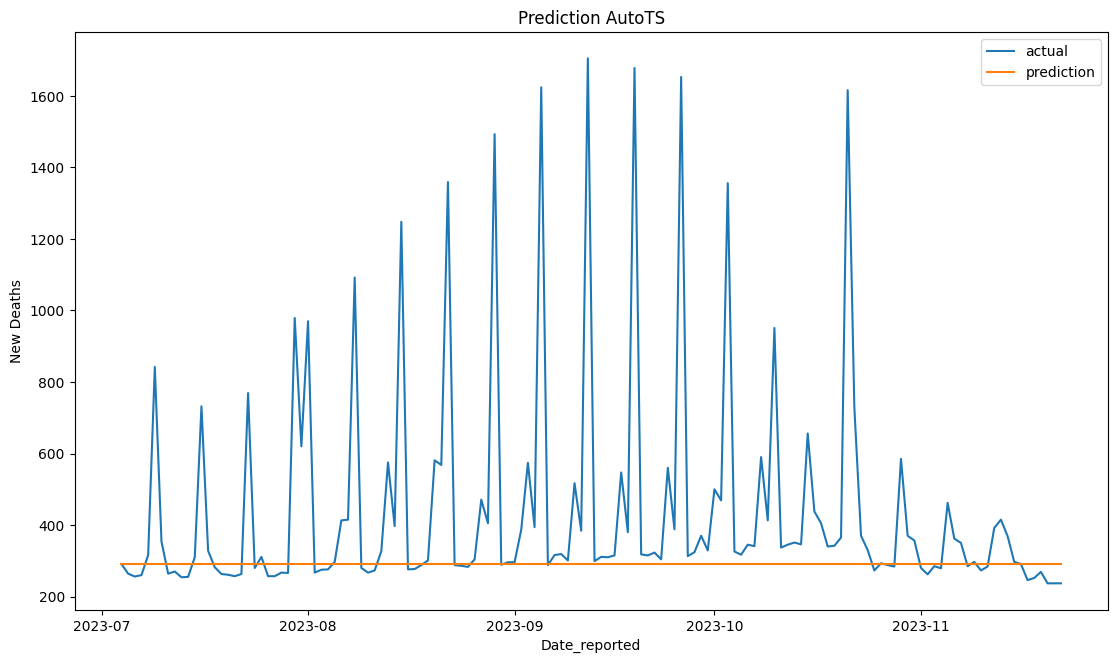

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], prediction.forecast, label="prediction")
ax.set_title("Prediction AutoTS")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

Metrics

In [28]:
max(prediction.forecast[target_column])

290.99999999999983

In [25]:
non_zero = []
import sys
 
for i in prediction.forecast[target_column]:
    if i == 0:
        non_zero.append(i+sys.float_info.min)
    else:
        non_zero.append(i)
print_evaluation_metrics(non_zero, test[target_column])

Evaluation Metrics:
MSE: 128398.01
RMSE: 358.33
MAE: 169.06
MAPE: 22.73
SMAPE: 30.16
